In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_absolute_error , mean_squared_error
from sklearn.model_selection import train_test_split
import statsmodels.api as sm

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


VERİ SETİ BAŞLIK KISALTMALARI

*  **1D**: birinci_doz,
*  **2D**: ikinci_doz,
*  **TP**: toplam_doz,
* **T2020N**: tuik_2020_nufus,
*  **1DBN** : 1.doz/nufus,
*  **2DBN** : 2.doz/nufus,
*  **DSH**: Dolasim Sistemi Hastaliklari,
*  **IHVKHT**: Iyi Huylu ve Kotu Huylu Tumorler,
*  **SSH** : Solunum Sistemi Hastaliklari,
*  **SSVDOH**: Sinir Sistemi ve Duyu Organlari Hastaliklari,
*  **ISBBVMIH**: Ic Salgi Bezi(Endokrin), Beslenme ve Metabolizmayla Ilgili Hastaliklar,
*   **DYNVZ**: Dissal Yaralanma Nedenleri ve Zehirlenmeler,
*   **COVID**,
*   **Diger**,
*   **Bilinmeyen**


Sonradan eklenenler:
*   **BDSınıf**: Birinci Doz Sınıfı
*   **IDSınıf**: İkinci Doz Sınıfı



















In [ ]:
df = pd.read_csv('/content/drive/MyDrive/GüncelVeri.csv')
print(df)

        Iller          1D          2D           TD      T2020N    1DBN  \
0       Adana         NaN         NaN          NaN         NaN     NaN   
1       Adana         NaN         NaN          NaN         NaN     NaN   
2       Adana   1348048.0   1029671.0    2590578.0   2258720.0  0.5968   
3       Adana   1348048.0   1029671.0    2590578.0   2258721.0  0.5968   
4    Adiyaman         NaN         NaN          NaN         NaN     NaN   
..        ...         ...         ...          ...         ...     ...   
323     Duzce    242045.0    194517.0     481161.0    395679.0  0.6117   
324   Turkiye         NaN         NaN          NaN         NaN     NaN   
325   Turkiye         NaN         NaN          NaN         NaN     NaN   
326   Turkiye  51768368.0  40619203.0  101881645.0  83614362.0  0.6191   
327   Turkiye  51768368.0  40619203.0  101881645.0  83614362.0  0.6191   

       2DBN   Yil     DSH  IHVKHT    SSH  SSVDOH  ISBBVMIH  DYNVZ    COVID  \
0       NaN  2019    4277    1969

Aşılama   Oranları
                                                        
*    0-25%     A Sınıfı
*   25-50%     B Sınıfı
*   50-75%     C Sınıfı
*   75-100%    D Sınıfı  




In [ ]:
def classify_value(value):
    if value < 0.25:
        return 'A'
    elif 0.25 <= value < 0.50:
        return 'B'
    elif 0.50 <= value < 0.75:
        return 'C'
    else:
        return 'D'

df['BDSınıf'] = df['1DBN'].apply(classify_value)
df['IDSınıf'] = df['2DBN'].apply(classify_value)

print(df)

        Iller          1D          2D           TD      T2020N    1DBN  \
0       Adana         NaN         NaN          NaN         NaN     NaN   
1       Adana         NaN         NaN          NaN         NaN     NaN   
2       Adana   1348048.0   1029671.0    2590578.0   2258720.0  0.5968   
3       Adana   1348048.0   1029671.0    2590578.0   2258721.0  0.5968   
4    Adiyaman         NaN         NaN          NaN         NaN     NaN   
..        ...         ...         ...          ...         ...     ...   
323     Duzce    242045.0    194517.0     481161.0    395679.0  0.6117   
324   Turkiye         NaN         NaN          NaN         NaN     NaN   
325   Turkiye         NaN         NaN          NaN         NaN     NaN   
326   Turkiye  51768368.0  40619203.0  101881645.0  83614362.0  0.6191   
327   Turkiye  51768368.0  40619203.0  101881645.0  83614362.0  0.6191   

       2DBN   Yil     DSH  IHVKHT    SSH  SSVDOH  ISBBVMIH  DYNVZ    COVID  \
0       NaN  2019    4277    1969

In [ ]:
df.head()

,Iller,1D,2D,TD,T2020N,1DBN,2DBN,Yil,DSH,IHVKHT,SSH,SSVDOH,ISBBVMIH,DYNVZ,COVID,Diger,Bilinmeyen,BDSınıf,IDSınıf
0,Adana,NaN,NaN,NaN,NaN,NaN,NaN,2019,4277,1969,1300,425,519,527,NaN,995,1387,D,D
1,Adana,NaN,NaN,NaN,NaN,NaN,NaN,2020,5276,2000,1673,350,656,537,1015.0,1178,830,D,D
2,Adana,1348048.0,1029671.0,2590578.0,2258720.0,0.5968,0.4559,2021,5075,1884,1894,132,475,558,2523.0,1134,1175,C,B
3,Adana,1348048.0,1029671.0,2590578.0,2258721.0,0.5968,0.4559,2022,4982,1881,1862,147,440,561,716.0,1113,1655,C,B
4,Adiyaman,NaN,NaN,NaN,NaN,NaN,NaN,2019,1097,416,402,108,132,123,NaN,380,85,D,D


In [ ]:
df.tail()

,Iller,1D,2D,TD,T2020N,1DBN,2DBN,Yil,DSH,IHVKHT,SSH,SSVDOH,ISBBVMIH,DYNVZ,COVID,Diger,Bilinmeyen,BDSınıf,IDSınıf
323,Duzce,242045.0,194517.0,481161.0,395679.0,0.6117,0.4916,2022,956,414,410,118,137,94,106.0,355,143,C,B
324,Turkiye,NaN,NaN,NaN,NaN,NaN,NaN,2019,163014,80720,57065,20196,19210,18293,NaN,59992,18134,D,D
325,Turkiye,NaN,NaN,NaN,NaN,NaN,NaN,2020,183442,79916,80284,20366,23401,17824,22274.0,61658,19883,D,D
326,Turkiye,51768368.0,40619203.0,101881645.0,83614362.0,0.6191,0.4858,2021,189876,79290,76126,18576,23639,18223,65366.0,66929,28460,C,B
327,Turkiye,51768368.0,40619203.0,101881645.0,83614362.0,0.6191,0.4858,2022,178501,76657,68370,18117,22832,16867,22025.0,65694,35776,C,B


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 328 entries, 0 to 327
Data columns (total 19 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Iller        328 non-null    object 
 1   1D           164 non-null    float64
 2   2D           164 non-null    float64
 3   TD           164 non-null    float64
 4   T2020N       164 non-null    float64
 5   1DBN         164 non-null    float64
 6   2DBN         164 non-null    float64
 7   Yil          328 non-null    int64  
 8   DSH          328 non-null    int64  
 9   IHVKHT       328 non-null    int64  
 10  SSH          328 non-null    int64  
 11  SSVDOH       328 non-null    int64  
 12  ISBBVMIH     328 non-null    int64  
 13  DYNVZ        328 non-null    int64  
 14  COVID        246 non-null    float64
 15  Diger        328 non-null    int64  
 16  Bilinmeyen   328 non-null    int64  
 17  BDSınıf      328 non-null    object 
 18  IDSınıf      328 non-null    object 
dtypes: float

In [ ]:
df['IDSınıf'] = df['IDSınıf'].astype(pd.StringDtype())

In [ ]:
df['BDSınıf'] = df['BDSınıf'].astype(pd.StringDtype())

In [ ]:
df.isnull().sum()

Iller            0
1D             164
2D             164
TD             164
T2020N         164
1DBN           164
2DBN           164
Yil              0
DSH              0
IHVKHT           0
SSH              0
SSVDOH           0
ISBBVMIH         0
DYNVZ            0
COVID           82
Diger            0
Bilinmeyen       0
BDSınıf          0
IDSınıf          0
dtype: int64

In [ ]:
df['1DBN'].fillna(df['1DBN'].mean(), inplace=True)

In [ ]:
df['2DBN'].fillna(df['2DBN'].mean(), inplace=True)

In [ ]:
df['1D'].fillna(df['1D'].mean(), inplace=True)

In [ ]:
df['2D'].fillna(df['2D'].mean(), inplace=True)

In [ ]:
df['TD'].fillna(df['TD'].mean(), inplace=True)

In [ ]:
df['T2020N'].fillna(df['T2020N'].mean(), inplace=True)

In [ ]:
df['COVID'].fillna(df['COVID'].mean(), inplace=True)

In [ ]:
print(df)

        Iller            1D            2D            TD        T2020N    1DBN  \
0       Adana  1.262643e+06  9.907123e+05  2.484918e+06  2.039375e+06  0.6171   
1       Adana  1.262643e+06  9.907123e+05  2.484918e+06  2.039375e+06  0.6171   
2       Adana  1.348048e+06  1.029671e+06  2.590578e+06  2.258720e+06  0.5968   
3       Adana  1.348048e+06  1.029671e+06  2.590578e+06  2.258721e+06  0.5968   
4    Adiyaman  1.262643e+06  9.907123e+05  2.484918e+06  2.039375e+06  0.6171   
..        ...           ...           ...           ...           ...     ...   
323     Duzce  2.420450e+05  1.945170e+05  4.811610e+05  3.956790e+05  0.6117   
324   Turkiye  1.262643e+06  9.907123e+05  2.484918e+06  2.039375e+06  0.6171   
325   Turkiye  1.262643e+06  9.907123e+05  2.484918e+06  2.039375e+06  0.6171   
326   Turkiye  5.176837e+07  4.061920e+07  1.018816e+08  8.361436e+07  0.6191   
327   Turkiye  5.176837e+07  4.061920e+07  1.018816e+08  8.361436e+07  0.6191   

         2DBN   Yil     DSH

In [ ]:
numeric_data = df[["1DBN","2DBN","Yil","DSH","IHVKHT","SSH","SSVDOH","ISBBVMIH","DYNVZ","COVID","Bilinmeyen ","Diger"]]

In [ ]:
numeric_data.std()

1DBN               0.066711
2DBN               0.080659
Yil                1.119742
DSH            19660.906790
IHVKHT          8765.433292
SSH             7831.160251
SSVDOH          2135.732846
ISBBVMIH        2464.648206
DYNVZ           1953.915389
COVID           4042.478367
Bilinmeyen      2938.530377
Diger           7024.027441
dtype: float64

In [ ]:
numeric_data.var()

1DBN           4.450330e-03
2DBN           6.505812e-03
Yil            1.253823e+00
DSH            3.865513e+08
IHVKHT         7.683282e+07
SSH            6.132707e+07
SSVDOH         4.561355e+06
ISBBVMIH       6.074491e+06
DYNVZ          3.817785e+06
COVID          1.634163e+07
Bilinmeyen     8.634961e+06
Diger          4.933696e+07
dtype: float64

In [ ]:
numeric_data.corr()

,1DBN,2DBN,Yil,DSH,IHVKHT,SSH,SSVDOH,ISBBVMIH,DYNVZ,COVID,Bilinmeyen,Diger
1DBN,1.000000e+00,0.981384,2.957238e-14,0.020558,0.020156,0.019135,0.019292,0.019838,0.014837,0.026390,0.008987,0.011716
2DBN,9.813837e-01,1.000000,-1.692986e-06,0.009467,0.008402,0.007626,0.008254,0.007777,0.003993,0.012361,-0.005431,-0.000367
Yil,2.957238e-14,-0.000002,1.000000e+00,0.007348,-0.003993,0.010378,-0.010265,0.012304,-0.005422,-0.000336,0.057161,0.008701
DSH,2.055821e-02,0.009467,7.347596e-03,1.000000,0.996158,0.996112,0.994326,0.997904,0.996697,0.779421,0.962252,0.997965
IHVKHT,2.015593e-02,0.008402,-3.992817e-03,0.996158,1.000000,0.990271,0.998742,0.994588,0.996613,0.747949,0.951098,0.997451
SSH,1.913502e-02,0.007626,1.037761e-02,0.996112,0.990271,1.000000,0.988539,0.996814,0.988770,0.796074,0.955137,0.992602
SSVDOH,1.929201e-02,0.008254,-1.026456e-02,0.994326,0.998742,0.988539,1.000000,0.992396,0.996511,0.730709,0.941118,0.994575
ISBBVMIH,1.983751e-02,0.007777,1.230435e-02,0.997904,0.994588,0.996814,0.992396,1.000000,0.992562,0.785975,0.965058,0.997514
DYNVZ,1.483722e-02,0.003993,-5.421859e-03,0.996697,0.996613,0.988770,0.996511,0.992562,1.000000,0.749021,0.947282,0.995211
COVID,2.639047e-02,0.012361,-3.364464e-04,0.779421,0.747949,0.796074,0.730709,0.785975,0.749021,1.000000,0.792293,0.773291


In [ ]:
print(df.describe().T)

             count          mean           std         min            25%  \
1D           328.0  1.262643e+06  4.059411e+06  44694.0000  317658.250000   
2D           328.0  9.907123e+05  3.183367e+06  35108.0000  252780.750000   
TD           328.0  2.484918e+06  7.980807e+06  90527.0000  637668.000000   
T2020N       328.0  2.039375e+06  6.551212e+06  81910.0000  540603.000000   
1DBN         328.0  6.171000e-01  6.671080e-02      0.3673       0.617100   
2DBN         328.0  4.925213e-01  8.065862e-02      0.2130       0.492521   
Yil          328.0  2.020500e+03  1.119742e+00   2019.0000    2019.750000   
DSH          328.0  4.358738e+03  1.966091e+04    162.0000     715.000000   
IHVKHT       328.0  1.930384e+03  8.765433e+03     71.0000     294.750000   
SSH          328.0  1.718567e+03  7.831160e+03     50.0000     255.750000   
SSVDOH       328.0  4.710671e+02  2.135733e+03      7.0000      67.000000   
ISBBVMIH     328.0  5.431829e+02  2.464648e+03     15.0000      86.250000   

In [ ]:
numeric_data.skew()

1DBN           -0.745610
2DBN           -0.691374
Yil             0.000000
DSH             8.671371
IHVKHT          8.452588
SSH             8.745838
SSVDOH          8.541871
ISBBVMIH        8.616244
DYNVZ           8.674350
COVID          13.456252
Bilinmeyen      9.430601
Diger           8.545743
dtype: float64

In [ ]:
numeric_data.kurtosis()

1DBN             2.774650
2DBN             2.198146
Yil             -1.362443
DSH             75.490928
IHVKHT          72.216415
SSH             78.049619
SSVDOH          73.718831
ISBBVMIH        75.140221
DYNVZ           75.240453
COVID          203.512848
Bilinmeyen      95.570576
Diger           73.672927
dtype: float64

# Tüm Hastalıklar ve İller Sütun Grafiği

<Figure size 1800x1000 with 0 Axes>

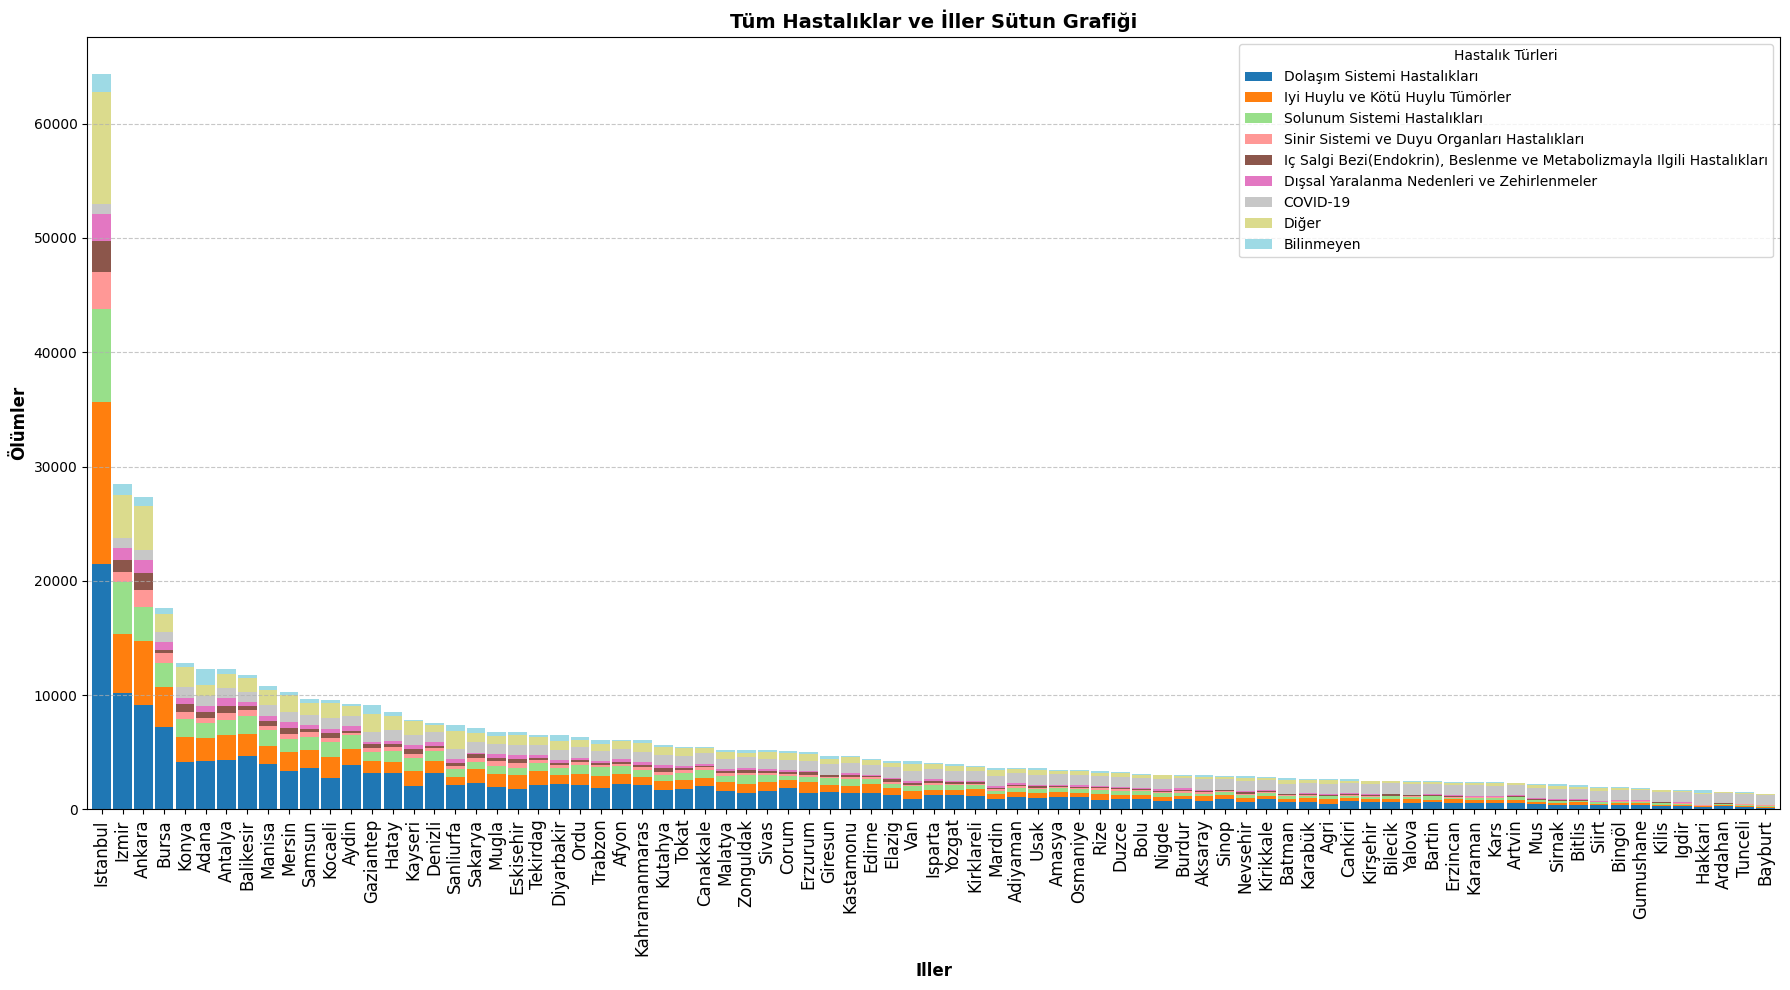

In [ ]:
# DataFrame'deki sütun isimlerinin başındaki ve sonundaki boşlukları temizler
df.columns = df.columns.str.strip()

# Özgün ve yeni sütun isimleri listeleri
columns = ['DSH', 'IHVKHT', 'SSH', 'SSVDOH', 'ISBBVMIH', 'DYNVZ', 'COVID', 'Diger', 'Bilinmeyen']
new_columns = [
    'Dolaşım Sistemi Hastalıkları',
    'Iyi Huylu ve Kötü Huylu Tümörler',
    'Solunum Sistemi Hastalıkları',
    'Sinir Sistemi ve Duyu Organları Hastalıkları',
    'Iç Salgi Bezi(Endokrin), Beslenme ve Metabolizmayla Ilgili Hastalıkları',
    'Dışsal Yaralanma Nedenleri ve Zehirlenmeler',
    'COVID-19',
    'Diğer',
    'Bilinmeyen'
]
df = df[df['Iller'].str.strip() != 'Turkiye'] # 'Iller' sütununda 'Turkiye' değeri olan satırları çıkarır
selected = df.drop_duplicates(subset='Iller', keep='first')[['Iller'] + columns]# 'Iller' sütununda yinelenen değerleri kaldırır ve belirtilen sütunları seçer

# 'Iller' sütununu indeks olarak ayarlar ve sütun isimlerini yeni isimlerle değiştirir
selected.set_index('Iller', inplace=True)
selected.columns = new_columns

# Her ilin toplam ölüm sayısını hesaplar, 'Total' sütununa ekler ve azalan sırayla sıralar
selected['Total'] = selected[new_columns].sum(axis=1)
selected = selected.sort_values(by='Total', ascending=False)


selected.drop(columns=['Total'], inplace=True)# 'Total' sütununu kaldırır

# Yığılmış çubuk grafik oluşturur
plt.figure(figsize=(18,10))
ax = selected.plot.bar(stacked=True, width=0.9, align='center', figsize=(18, 10), colormap='tab20')

# Grafik etiketlerini ve legend ayarlar
ax.set_title('Tüm Hastalıklar ve İller Sütun Grafiği', fontweight='bold', fontsize=14)
ax.set_xlabel('Iller', fontweight='bold', fontsize=12)
ax.set_ylabel('Ölümler', fontweight='bold', fontsize=12)
ax.set_xticklabels(selected.index, rotation=90, fontsize=12)
ax.grid(axis='y', linestyle='--', alpha=0.7)
ax.legend(title='Hastalık Türleri')

# Grafiği düzenler ve görüntüler
plt.tight_layout()
plt.show()


# İstanbul Pie Chart

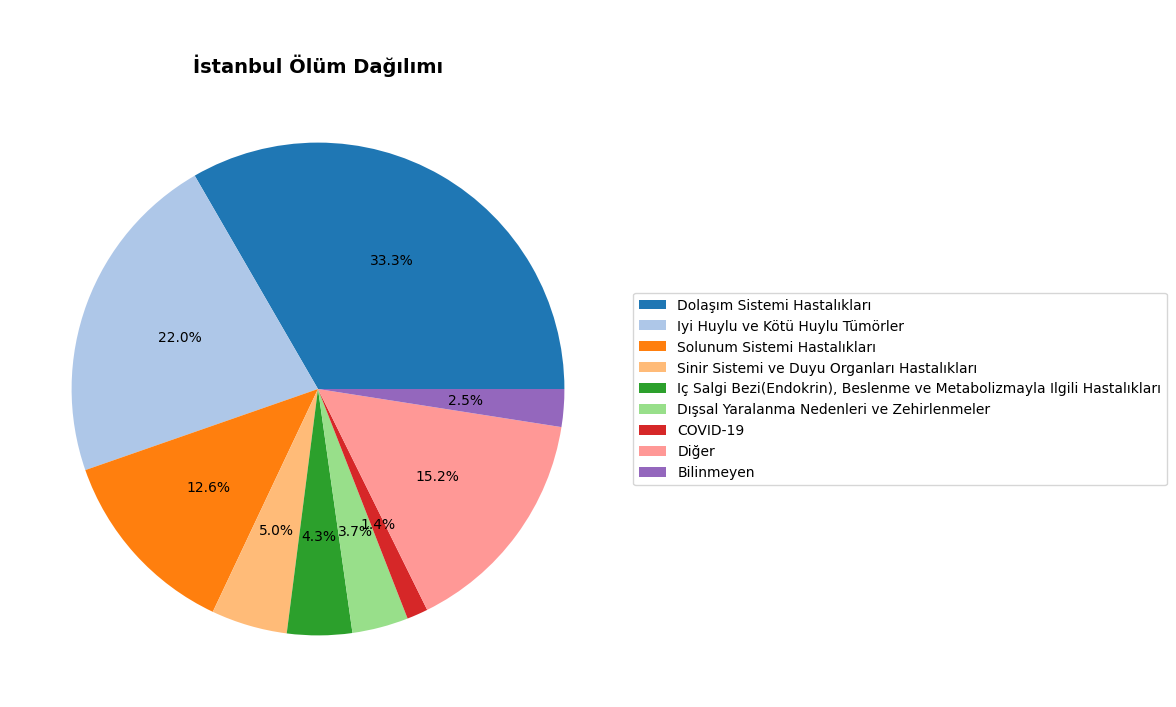

In [ ]:
istanbul_data = selected.loc['Istanbul']# 'Istanbul' verisini seçer

# Etiketleri ve renkleri ayarlar
labels = istanbul_data.index
colors = plt.cm.tab20.colors[:len(labels)]

# Grafik boyutlarını ayarlar ve pasta grafiği oluşturur
fig, ax = plt.subplots(figsize=(10, 8))
patches, _, _ = ax.pie(istanbul_data, labels=None, autopct='%1.1f%%', colors=colors)

ax.set_title('\n\nİstanbul Ölüm Dağılımı', fontweight='bold', fontsize=14)# Grafiğe başlık ekler

# Legend etiketlerini ayarlar
legend_labels = [f"{label}" for i, label in enumerate(labels)]
ax.legend(patches, legend_labels, loc="center left", bbox_to_anchor=(1, 0.5), fontsize=10)

plt.show()# Grafiği görüntüler


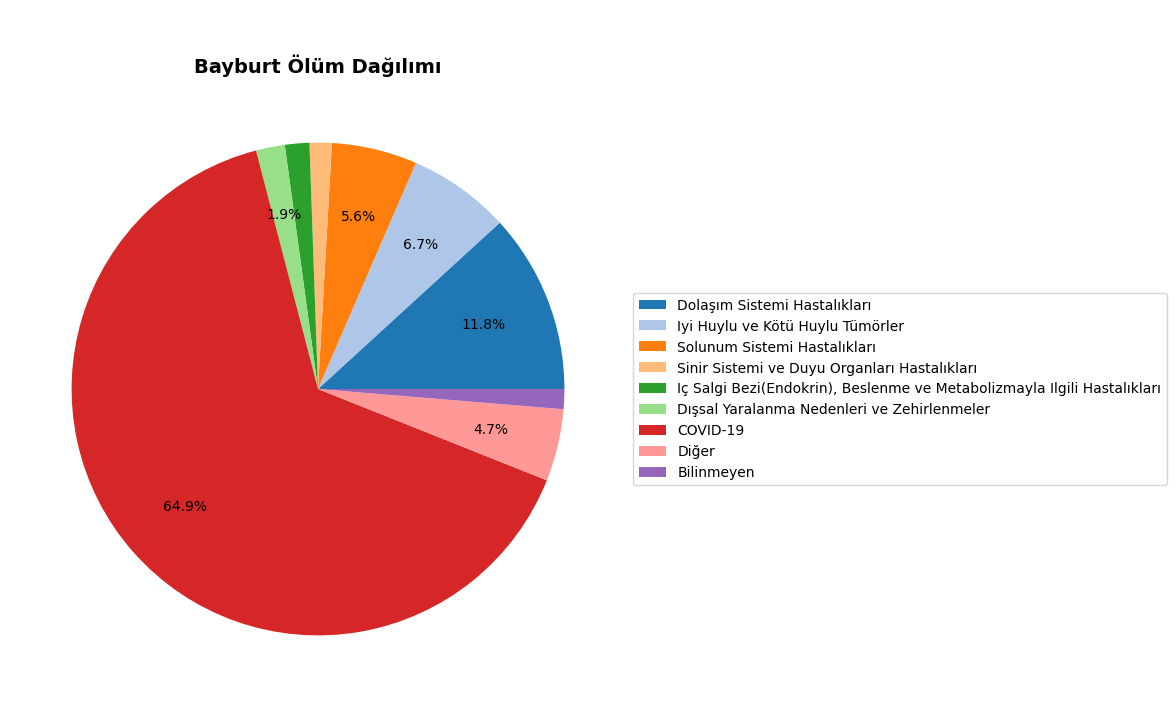

In [ ]:
Bayburt_data = selected.loc['Bayburt']

# Etiketleri ve renkleri ayarlar
labels = Bayburt_data.index
colors = plt.cm.tab20.colors[:len(labels)]

# Yüzde yazılarını konumlandırmak için fonksiyon
def autopct_generator(pct):
    return ('%.1f%%' % pct) if pct > 1.8 else ''

# Grafik boyutlarını ayarlar ve pasta grafiği oluşturur
fig, ax = plt.subplots(figsize=(10, 8))
patches, texts, autotexts = ax.pie(Bayburt_data, labels=None, autopct=autopct_generator, colors=colors)

# Yüzdeleri formatlar ve konumlarını ayarlar
for i, autotext in enumerate(autotexts):
    x = autotext.get_position()[0] * 1.2
    y = autotext.get_position()[1] * 1.2
    autotext.set_position((x, y))
    autotext.set_color('black')
    autotext.set_fontsize(10)


ax.set_title('\n\nBayburt Ölüm Dağılımı', fontweight='bold', fontsize=14)  # Grafiğe başlık ekler

# Legend etiketlerini ayarlar
legend_labels = [f"{label}" for label in labels]
ax.legend(patches, legend_labels, loc="center left", bbox_to_anchor=(1, 0.5), fontsize=10)

plt.show()  # Grafiği görüntüler

# İç Anadolu Bölgesinden İki İlimizin Ölüm Dağılımı Pie Chart

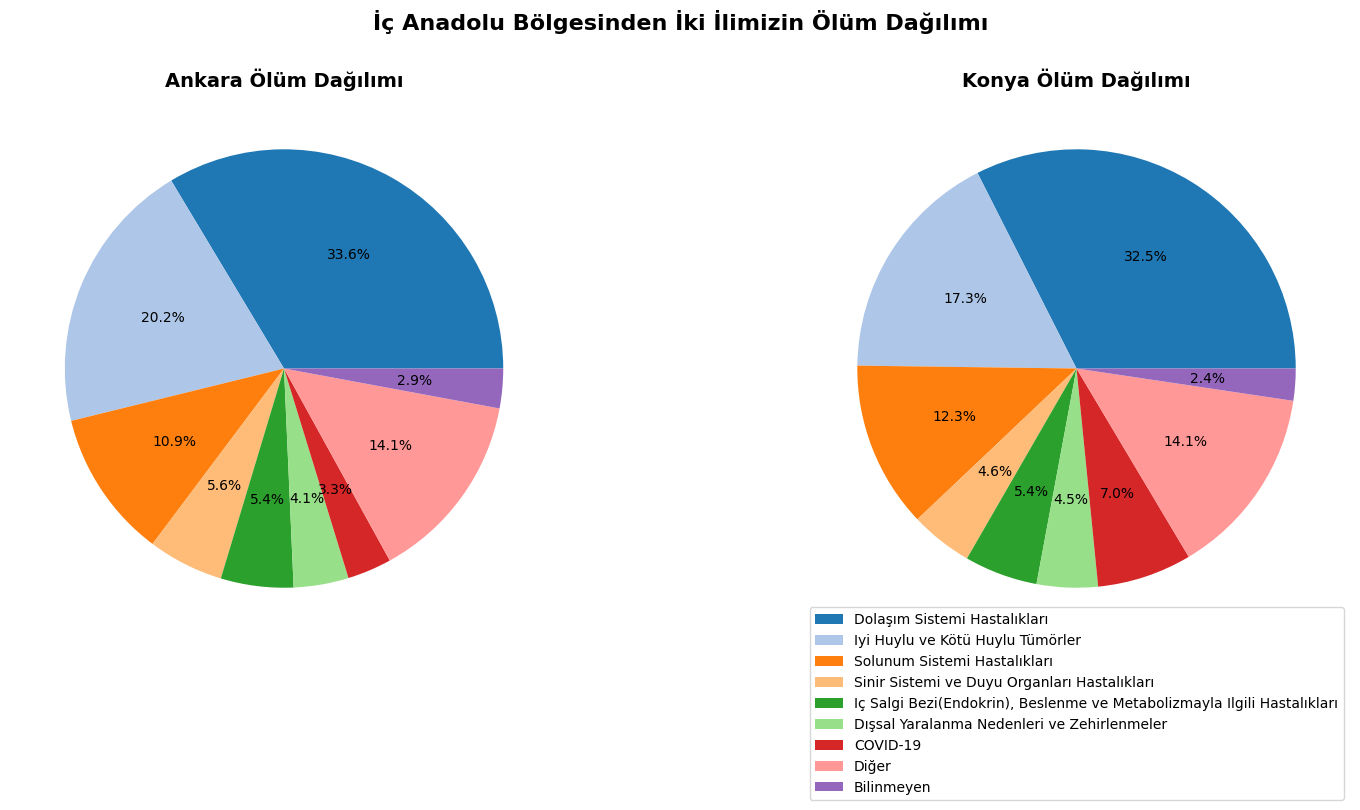

In [ ]:
# 'Ankara' ve 'Konya' verilerini seçer
ic_anadolu_data1 = selected.loc['Ankara']
ic_anadolu_data2 = selected.loc['Konya']

# Etiketleri ve renkleri ayarlar
labels1 = ic_anadolu_data1.index
colors1 = plt.cm.tab20.colors[:len(labels1)]

labels2 = ic_anadolu_data2.index
colors2 = plt.cm.tab20.colors[:len(labels2)]

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 8))# Grafik boyutlarını ayarlar ve iki pasta grafiği oluşturur

# Ankara için pasta grafiği oluşturur
patches1, _, _ = ax1.pie(ic_anadolu_data1, labels=None, autopct='%1.1f%%', colors=colors1)
ax1.set_title('Ankara Ölüm Dağılımı', fontweight='bold', fontsize=14)

# Konya için pasta grafiği oluşturur
patches2, _, _ = ax2.pie(ic_anadolu_data2, labels=None, autopct='%1.1f%%', colors=colors2)
ax2.set_title('Konya Ölüm Dağılımı', fontweight='bold', fontsize=14)

# Legend etiketlerini ayarlar
legend_labels = [f"{label}" for i, label in enumerate(labels1)]
ax2.legend(patches2, legend_labels, loc="lower center", bbox_to_anchor=(0.5, -0.3), fontsize=10)

plt.suptitle('İç Anadolu Bölgesinden İki İlimizin Ölüm Dağılımı\n\n', fontsize=16, fontweight='bold')# Genel başlık ekler

# Grafikleri düzenler ve görüntüler
plt.tight_layout()
plt.show()


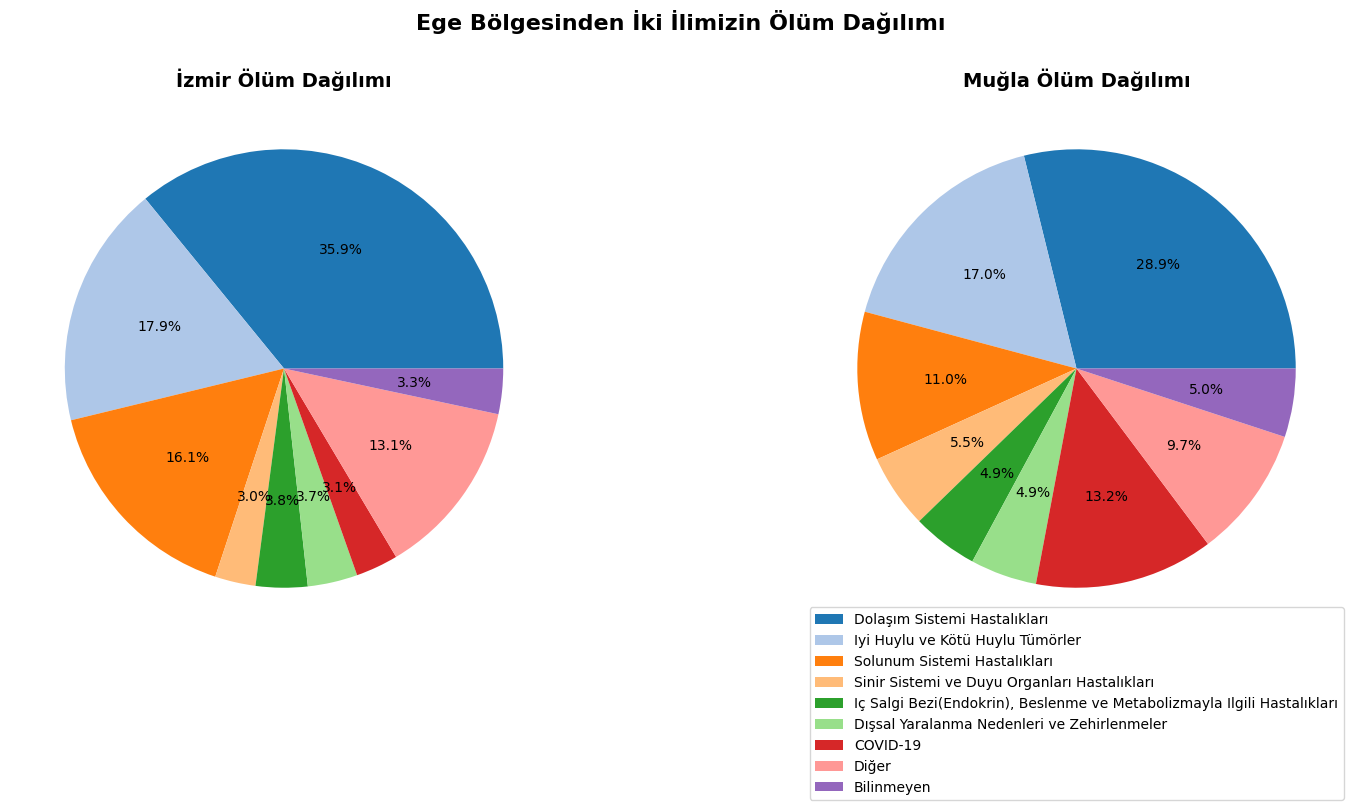

In [ ]:
# 'Izmir' ve 'Mugla' verilerini seçer
ic_anadolu_data1 = selected.loc['Izmir']
ic_anadolu_data2 = selected.loc['Mugla']

# Etiketleri ve renkleri ayarlar
labels1 = ic_anadolu_data1.index
colors1 = plt.cm.tab20.colors[:len(labels1)]

labels2 = ic_anadolu_data2.index
colors2 = plt.cm.tab20.colors[:len(labels2)]

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 8))# Grafik boyutlarını ayarlar ve iki pasta grafiği oluşturur

# İzmir için pasta grafiği oluşturur
patches1, _, _ = ax1.pie(ic_anadolu_data1, labels=None, autopct='%1.1f%%', colors=colors1)
ax1.set_title('İzmir Ölüm Dağılımı', fontweight='bold', fontsize=14)

# Muğla için pasta grafiği oluşturur
patches2, _, _ = ax2.pie(ic_anadolu_data2, labels=None, autopct='%1.1f%%', colors=colors2)
ax2.set_title('Muğla Ölüm Dağılımı', fontweight='bold', fontsize=14)

# Legend etiketlerini ayarlar
legend_labels = [f"{label}" for i, label in enumerate(labels1)]
ax2.legend(patches2, legend_labels, loc="lower center", bbox_to_anchor=(0.5, -0.3), fontsize=10)

plt.suptitle('Ege Bölgesinden İki İlimizin Ölüm Dağılımı\n\n', fontsize=16, fontweight='bold')# Genel başlık ekler

# Grafikleri düzenler ve görüntüler
plt.tight_layout()
plt.show()


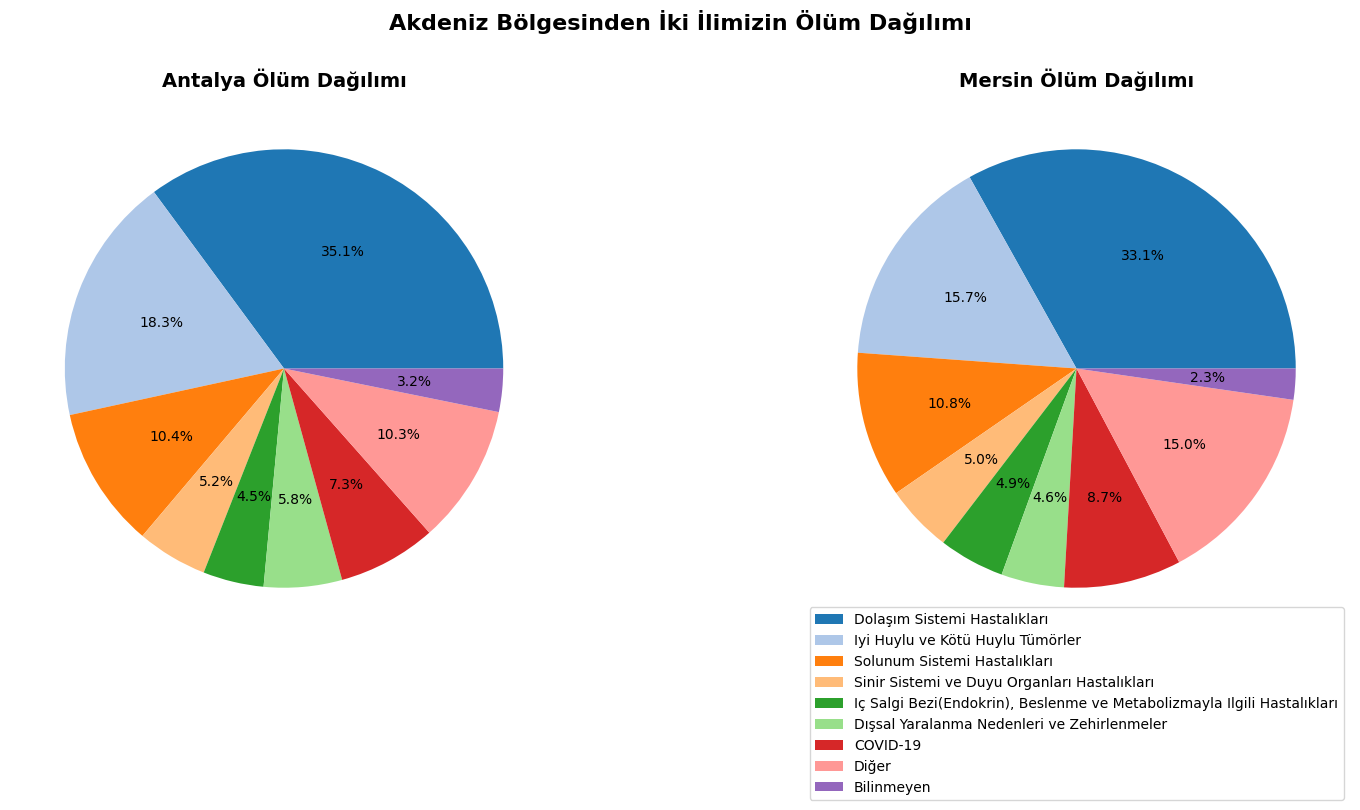

In [ ]:
# 'Antalya' ve 'Mersin' verilerini seçer
ic_anadolu_data1 = selected.loc['Antalya']
ic_anadolu_data2 = selected.loc['Mersin']

# Etiketleri ve renkleri ayarlar
labels1 = ic_anadolu_data1.index
colors1 = plt.cm.tab20.colors[:len(labels1)]

labels2 = ic_anadolu_data2.index
colors2 = plt.cm.tab20.colors[:len(labels2)]

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 8))# Grafik boyutlarını ayarlar ve iki pasta grafiği oluşturur

# Antalya için pasta grafiği oluşturur
patches1, _, _ = ax1.pie(ic_anadolu_data1, labels=None, autopct='%1.1f%%', colors=colors1)
ax1.set_title('Antalya Ölüm Dağılımı', fontweight='bold', fontsize=14)

# Mersin için pasta grafiği oluşturur
patches2, _, _ = ax2.pie(ic_anadolu_data2, labels=None, autopct='%1.1f%%', colors=colors2)
ax2.set_title('Mersin Ölüm Dağılımı', fontweight='bold', fontsize=14)

# Legend etiketlerini ayarlar
legend_labels = [f"{label}" for i, label in enumerate(labels1)]
ax2.legend(patches2, legend_labels, loc="lower center", bbox_to_anchor=(0.5, -0.3), fontsize=10)

plt.suptitle('Akdeniz Bölgesinden İki İlimizin Ölüm Dağılımı\n\n', fontsize=16, fontweight='bold')# Genel başlık ekler

# Grafikleri düzenler ve görüntüler
plt.tight_layout()
plt.show()


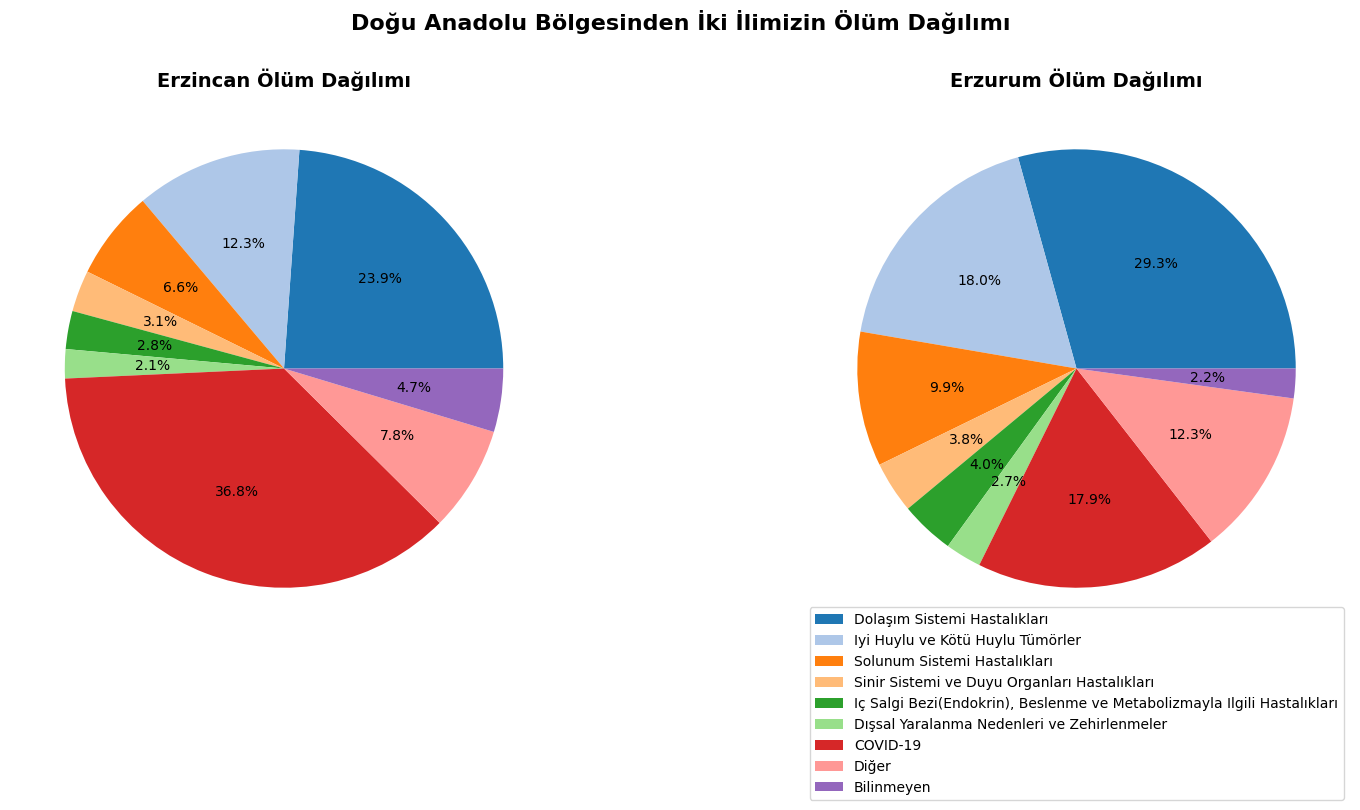

In [ ]:
# 'Erzincan' ve 'Erzurum' verilerini seçer
ic_anadolu_data1 = selected.loc['Erzincan']
ic_anadolu_data2 = selected.loc['Erzurum']

# Etiketleri ve renkleri ayarlar
labels1 = ic_anadolu_data1.index
colors1 = plt.cm.tab20.colors[:len(labels1)]

labels2 = ic_anadolu_data2.index
colors2 = plt.cm.tab20.colors[:len(labels2)]

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 8))# Grafik boyutlarını ayarlar ve iki pasta grafiği oluşturur

# Erzincan için pasta grafiği oluşturur
patches1, _, _ = ax1.pie(ic_anadolu_data1, labels=None, autopct='%1.1f%%', colors=colors1)
ax1.set_title('Erzincan Ölüm Dağılımı', fontweight='bold', fontsize=14)

# Erzurum için pasta grafiği oluşturur
patches2, _, _ = ax2.pie(ic_anadolu_data2, labels=None, autopct='%1.1f%%', colors=colors2)
ax2.set_title('Erzurum Ölüm Dağılımı', fontweight='bold', fontsize=14)

# Legend etiketlerini ayarlar
legend_labels = [f"{label}" for i, label in enumerate(labels1)]
ax2.legend(patches2, legend_labels, loc="lower center", bbox_to_anchor=(0.5, -0.3), fontsize=10)

plt.suptitle('Doğu Anadolu Bölgesinden İki İlimizin Ölüm Dağılımı\n\n', fontsize=16, fontweight='bold')# Genel başlık ekler

# Grafikleri düzenler ve görüntüler
plt.tight_layout()
plt.show()


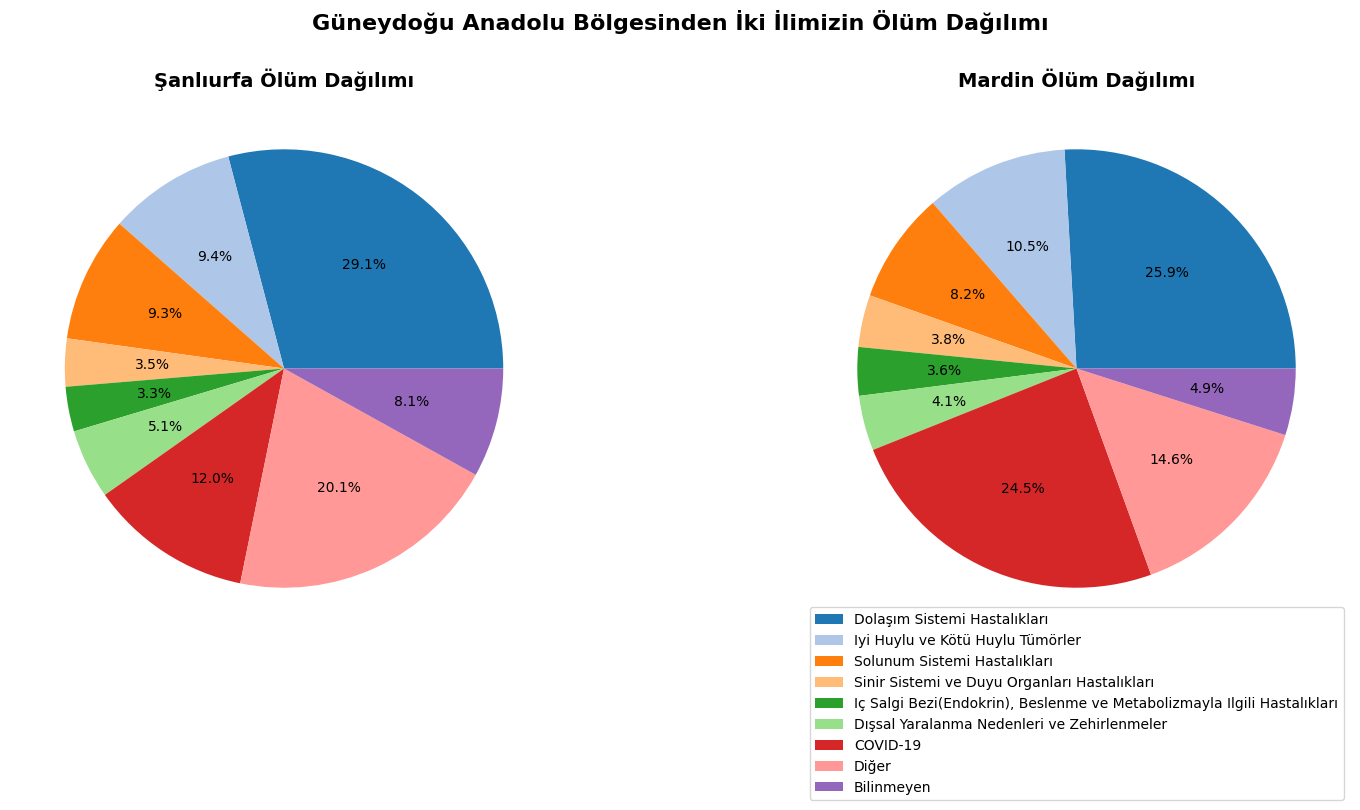

In [ ]:
# 'Şanlıurfa' ve 'Mardin' verilerini seçer
ic_anadolu_data1 = selected.loc['Sanliurfa']
ic_anadolu_data2 = selected.loc['Mardin']

# Etiketleri ve renkleri ayarlar
labels1 = ic_anadolu_data1.index
colors1 = plt.cm.tab20.colors[:len(labels1)]

labels2 = ic_anadolu_data2.index
colors2 = plt.cm.tab20.colors[:len(labels2)]

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 8))# Grafik boyutlarını ayarlar ve iki pasta grafiği oluşturur

# Şanlıurfa için pasta grafiği oluşturur
patches1, _, _ = ax1.pie(ic_anadolu_data1, labels=None, autopct='%1.1f%%', colors=colors1)
ax1.set_title('Şanlıurfa Ölüm Dağılımı', fontweight='bold', fontsize=14)

# Mardin için pasta grafiği oluşturur
patches2, _, _ = ax2.pie(ic_anadolu_data2, labels=None, autopct='%1.1f%%', colors=colors2)
ax2.set_title('Mardin Ölüm Dağılımı', fontweight='bold', fontsize=14)

# Legend etiketlerini ayarlar
legend_labels = [f"{label}" for i, label in enumerate(labels1)]
ax2.legend(patches2, legend_labels, loc="lower center", bbox_to_anchor=(0.5, -0.3), fontsize=10)

plt.suptitle('Güneydoğu Anadolu Bölgesinden İki İlimizin Ölüm Dağılımı\n\n', fontsize=16, fontweight='bold')# Genel başlık ekler

# Grafikleri düzenler ve görüntüler
plt.tight_layout()
plt.show()


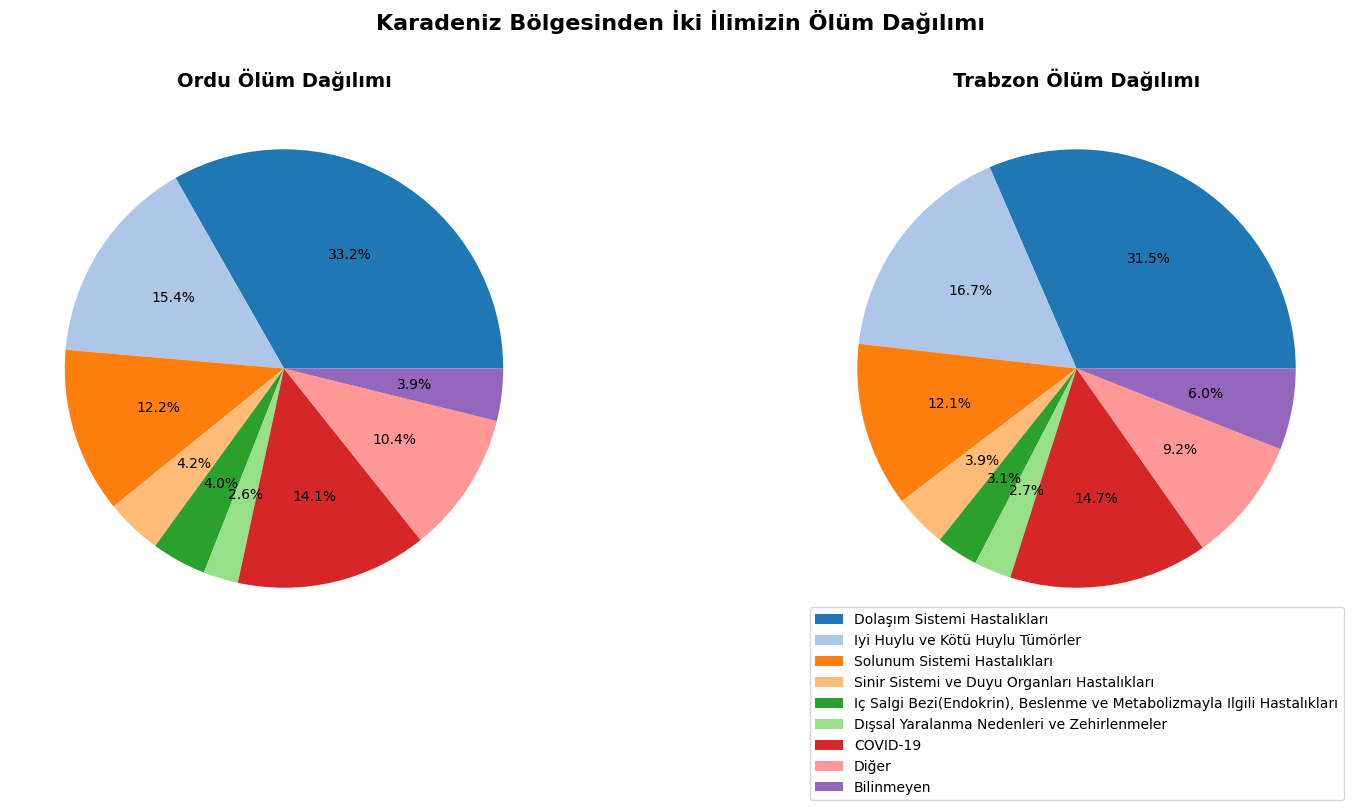

In [ ]:
# 'Ordu' ve 'Trabzon' verilerini seçer
ic_anadolu_data1 = selected.loc['Ordu']
ic_anadolu_data2 = selected.loc['Trabzon']

# Etiketleri ve renkleri ayarlar
labels1 = ic_anadolu_data1.index
colors1 = plt.cm.tab20.colors[:len(labels1)]

labels2 = ic_anadolu_data2.index
colors2 = plt.cm.tab20.colors[:len(labels2)]

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 8))# Grafik boyutlarını ayarlar ve iki pasta grafiği oluşturur

# Ordu için pasta grafiği oluşturur
patches1, _, _ = ax1.pie(ic_anadolu_data1, labels=None, autopct='%1.1f%%', colors=colors1)
ax1.set_title('Ordu Ölüm Dağılımı', fontweight='bold', fontsize=14)

# Trabzon için pasta grafiği oluşturur
patches2, _, _ = ax2.pie(ic_anadolu_data2, labels=None, autopct='%1.1f%%', colors=colors2)
ax2.set_title('Trabzon Ölüm Dağılımı', fontweight='bold', fontsize=14)

# Legend etiketlerini ayarlar
legend_labels = [f"{label}" for i, label in enumerate(labels1)]
ax2.legend(patches2, legend_labels, loc="lower center", bbox_to_anchor=(0.5, -0.3), fontsize=10)

plt.suptitle('Karadeniz Bölgesinden İki İlimizin Ölüm Dağılımı\n\n', fontsize=16, fontweight='bold')# Genel başlık ekler

# Grafikleri düzenler ve görüntüler
plt.tight_layout()
plt.show()


# Numeric Dataların Korelasyon Matrisleri

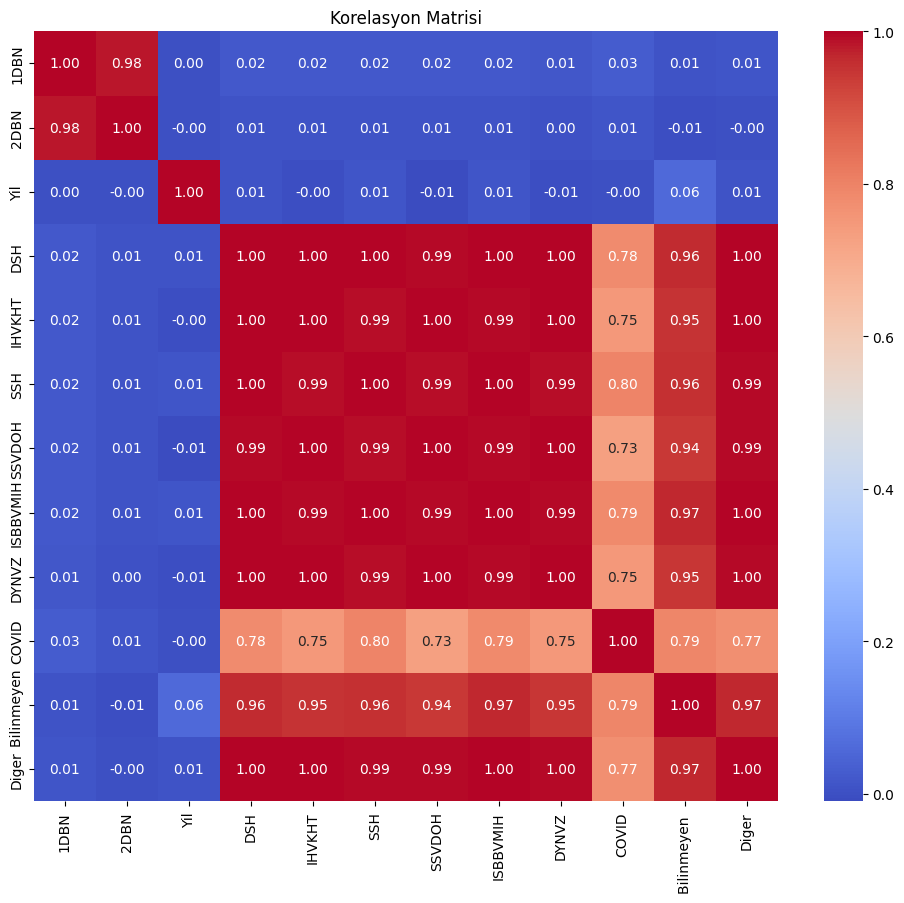

In [ ]:
# Isı haritası oluşturur, sayısal veriler arasındaki korelasyonu gösterir
plt.figure(figsize=(12, 10))
sns.heatmap(numeric_data.corr(), annot=True, cmap="coolwarm", fmt=".2f")

plt.title("Korelasyon Matrisi")# Grafik başlığını ayarlar

plt.show()# Grafiği görüntüler


# 1.Doz ve 2.Doz Aşı Oranlarının Yıllara Göre Dağılım Grafiği

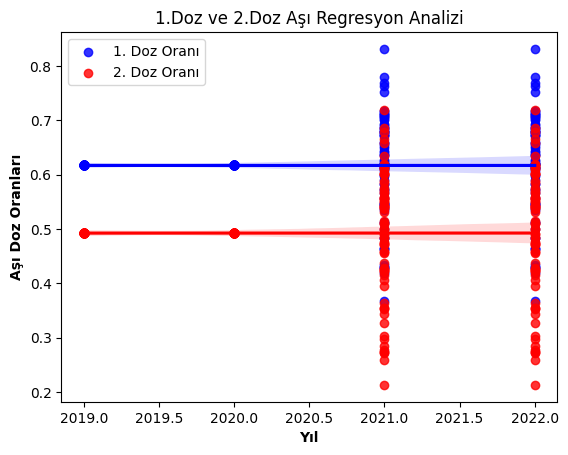

In [ ]:
# df veri çerçevesindeki 'Yil' sütununu x ekseni, '1DBN' sütununu y ekseni olarak kullanarak regresyon çizimini oluşturur
sns.regplot(x=df['Yil'], y=df['1DBN'], color='blue', label='1. Doz Oranı')

# df veri çerçevesindeki 'Yil' sütununu x ekseni, '2DBN' sütununu y ekseni olarak kullanarak regresyon çizimini oluşturur
sns.regplot(x=df['Yil'], y=df['2DBN'], color='red', label='2. Doz Oranı')

# Grafik başlığını, x ve y eksenlerini ayarlar
plt.title('1.Doz ve 2.Doz Aşı Regresyon Analizi')
plt.xlabel('Yıl', fontweight='bold')
plt.ylabel('Aşı Doz Oranları', fontweight='bold')

plt.legend() # legend görüntüler

plt.show()# Grafiği görüntüler


# Hastalıkların Ölüm Oranları ve Yıllara Göre Dağılım Grafiği

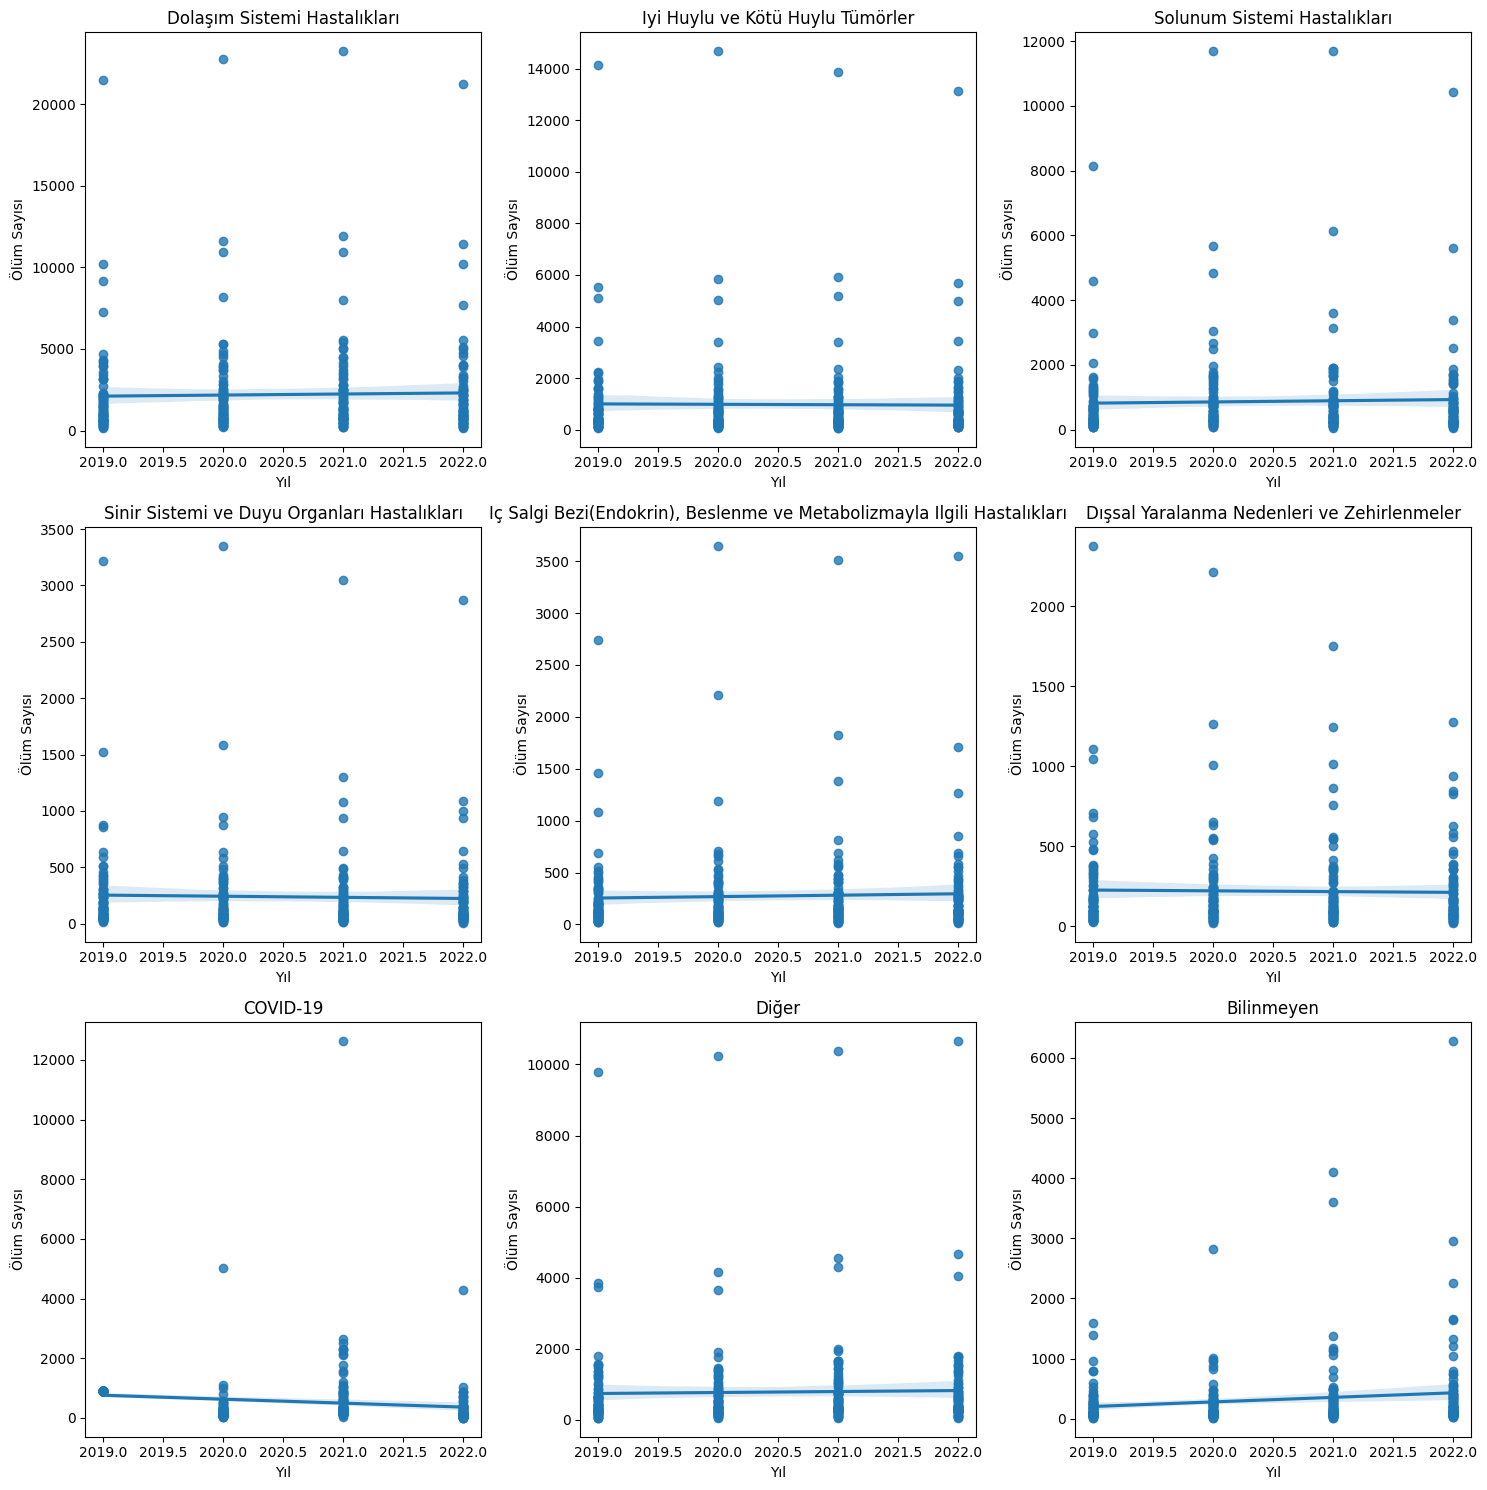

In [ ]:
columns = ['DSH', 'IHVKHT', 'SSH', 'SSVDOH', 'ISBBVMIH', 'DYNVZ', 'COVID', 'Diger', 'Bilinmeyen']
new_columns = [
    'Dolaşım Sistemi Hastalıkları',
    'Iyi Huylu ve Kötü Huylu Tümörler',
    'Solunum Sistemi Hastalıkları',
    'Sinir Sistemi ve Duyu Organları Hastalıkları',
    'Iç Salgi Bezi(Endokrin), Beslenme ve Metabolizmayla Ilgili Hastalıkları',
    'Dışsal Yaralanma Nedenleri ve Zehirlenmeler',
    'COVID-19',
    'Diğer',
    'Bilinmeyen'
]

column_mapping = dict(zip(columns, new_columns))# columns ve new_columns listelerini kullanarak sütun adlarını yeniden adlandırır

selected.rename(columns=column_mapping, inplace=True)# Seçili veri çerçevesindeki sütun adlarını yeniden adlandırır

# 3x3 bir alt grafik düzeni oluşturur ve her bir alt grafiği tek tek ayarlar
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(15, 15))
axes = axes.flatten()

# Her alt grafik için regresyon çizimini oluşturur
for ax, col, new_col in zip(axes, columns, new_columns):
    sns.regplot(x=df['Yil'], y=df[col], ax=ax)
    ax.set_title(new_col)
    ax.set_xlabel('Yıl')
    ax.set_ylabel('Ölüm Sayısı')

# Grafikleri düzenler ve görüntüler
plt.tight_layout()
plt.show()


# Hastalıkların Ortalama Ölümleri ve Aşı Sınıf Grafiği

Original columns: Index(['Iller', '1D', '2D', 'TD', 'T2020N', '1DBN', '2DBN', 'Yil', 'DSH',
       'IHVKHT', 'SSH', 'SSVDOH', 'ISBBVMIH', 'DYNVZ', 'COVID', 'Diger',
       'Bilinmeyen', 'BDSınıf', 'IDSınıf'],
      dtype='object')


<ipython-input-46-4f833813d7b3>:37: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=averages, x='Disease', y='value', hue='BDSınıf', palette=class_colors, ci=None, hue_order=['A', 'B', 'C', 'D'])
<ipython-input-46-4f833813d7b3>:53: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=averages, x='Disease', y='value', hue='IDSınıf', palette=class_colors, ci=None, hue_order=['A', 'B', 'C', 'D'])


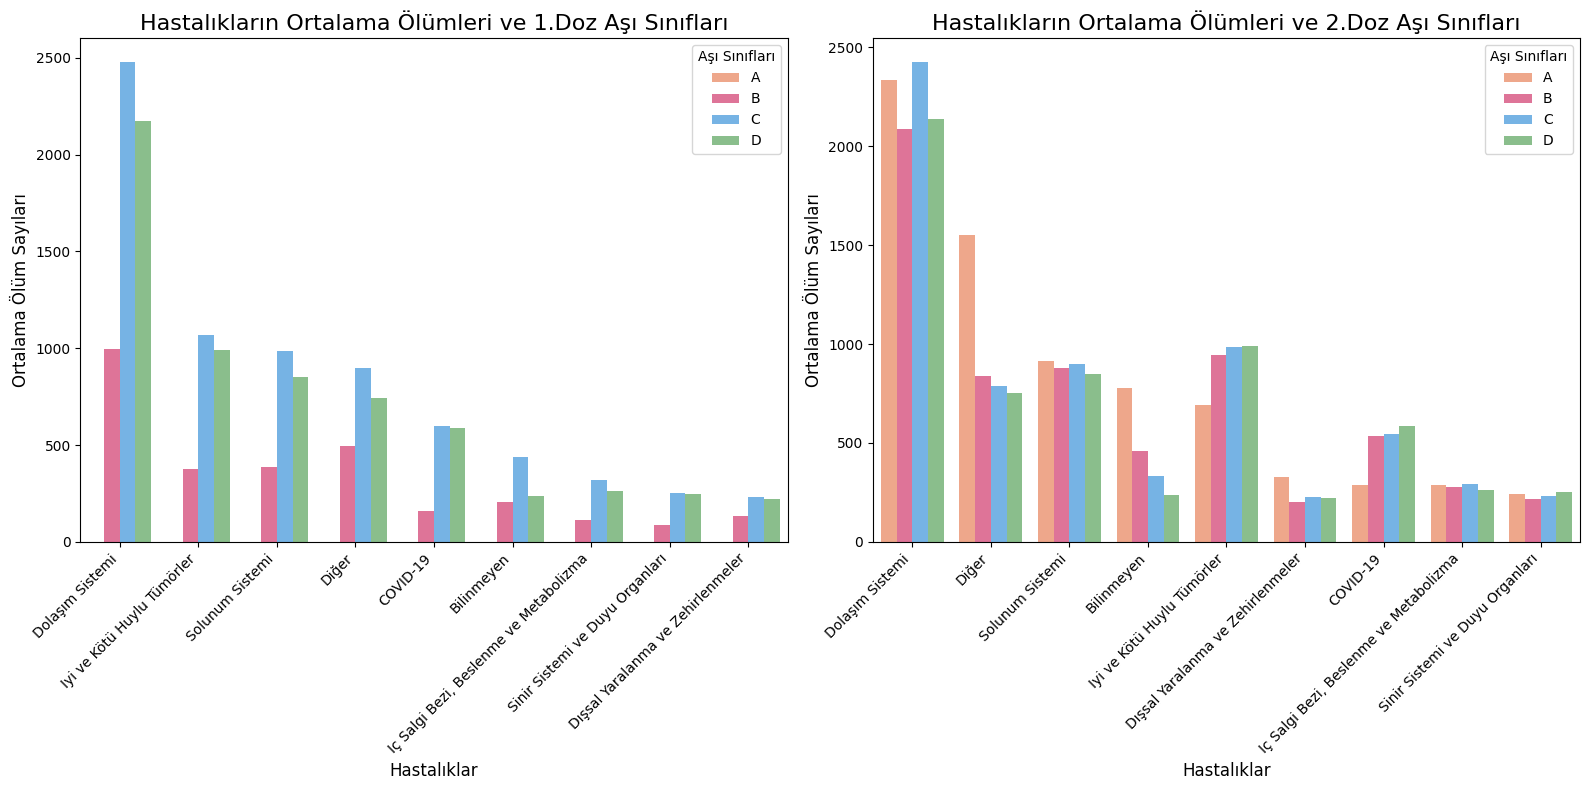

In [ ]:
# Sınıfların renklerini ve etiketlerini belirler
class_colors = {
    'A': '#FFA07A',  # Açık kırmızı
    'B': '#F06292',  # Açık pembe
    'C': '#64B5F6',  # Açık mavi
    'D': '#81C784'   # Açık yeşil
}



print("Original columns:", df.columns)

new_columns = [
    'Dolaşım Sistemi',
    'Iyi ve Kötü Huylu Tümörler',
    'Solunum Sistemi',
    'Sinir Sistemi ve Duyu Organları',
    'Iç Salgi Bezi, Beslenme ve Metabolizma',
    'Dışsal Yaralanma ve Zehirlenmeler',
    'COVID-19',
    'Diğer',
    'Bilinmeyen'
]


column_labels = dict(zip(columns, new_columns))# Sütunları yeniden adlandırır
plt.figure(figsize=(16, 8))# İki alt grafik oluşturur ve her birinin içeriğini doldurur

plt.subplot(1, 2, 1)
# Aşı sınıfına göre hastalık ortalamalarını hesaplar ve çubuk grafiği çizer
averages = df.groupby('BDSınıf')[columns].mean()
averages = averages.unstack().reset_index(name='value').rename(columns={'level_0': 'Disease'})
averages['Disease'] = averages['Disease'].map(column_labels)
sorted_categories = averages.groupby('BDSınıf')['value'].mean().sort_values(ascending=False).index
averages['BDSınıf'] = pd.Categorical(averages['BDSınıf'], categories=sorted_categories, ordered=True)
averages = averages.sort_values(['BDSınıf', 'value'], ascending=[True, False])
sns.barplot(data=averages, x='Disease', y='value', hue='BDSınıf', palette=class_colors, ci=None, hue_order=['A', 'B', 'C', 'D'])
plt.title('Hastalıkların Ortalama Ölümleri ve 1.Doz Aşı Sınıfları', fontsize=16)
plt.xlabel('Hastalıklar', fontsize=12)
plt.ylabel('Ortalama Ölüm Sayıları', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.legend(title='Aşı Sınıfları')


plt.subplot(1, 2, 2)
# Aşı sınıfına göre hastalık ortalamalarını hesaplar ve çubuk grafiği çizer
averages = df.groupby('IDSınıf')[columns].mean()
averages = averages.unstack().reset_index(name='value').rename(columns={'level_0': 'Disease'})
averages['Disease'] = averages['Disease'].map(column_labels)
sorted_categories = averages.groupby('IDSınıf')['value'].mean().sort_values(ascending=False).index
averages['IDSınıf'] = pd.Categorical(averages['IDSınıf'], categories=sorted_categories, ordered=True)
averages = averages.sort_values(['IDSınıf', 'value'], ascending=[True, False])
sns.barplot(data=averages, x='Disease', y='value', hue='IDSınıf', palette=class_colors, ci=None, hue_order=['A', 'B', 'C', 'D'])
plt.title('Hastalıkların Ortalama Ölümleri ve 2.Doz Aşı Sınıfları', fontsize=16)
plt.xlabel('Hastalıklar', fontsize=12)
plt.ylabel('Ortalama Ölüm Sayıları', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.legend(title='Aşı Sınıfları')

# Grafikleri düzenler ve görüntüler
plt.tight_layout()
plt.show()


Aşı Oranı
*    A: 0-25%
*    B: 25-50%
*    C: 50-75%
*    D: 75-100%









*  1.Doz Aşılama oranı B,C,D kategorisinde ki illerde Dolaşım sistemleri hastalığı (DSH) kaynaklı ölümler daha sık görülmüştür.

*   2.Doz Aşılama oranı A,B,C,D kategorisinde ki illerde Dolaşım sistemleri hastalığı (DSH) kaynaklı ölümler daha sık görülmüştür.










# İller ve Aşı Oranları Sınıf Grafiği

<ipython-input-106-8aec2dca152a>:10: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=df_sorted_1DBN, x='Iller', y='1DBN', hue='BDSınıf', hue_order=['A', 'B', 'C', 'D'], palette={'A': '#1f77b4', 'B': '#ff7f0e', 'C': '#2ca02c', 'D': '#d62728'}, ci=None)
<ipython-input-106-8aec2dca152a>:18: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=df_sorted_2DBN, x='Iller', y='2DBN', hue='IDSınıf', hue_order=['A', 'B', 'C', 'D'], palette={'A': '#1f77b4', 'B': '#ff7f0e', 'C': '#2ca02c', 'D': '#d62728'}, ci=None)


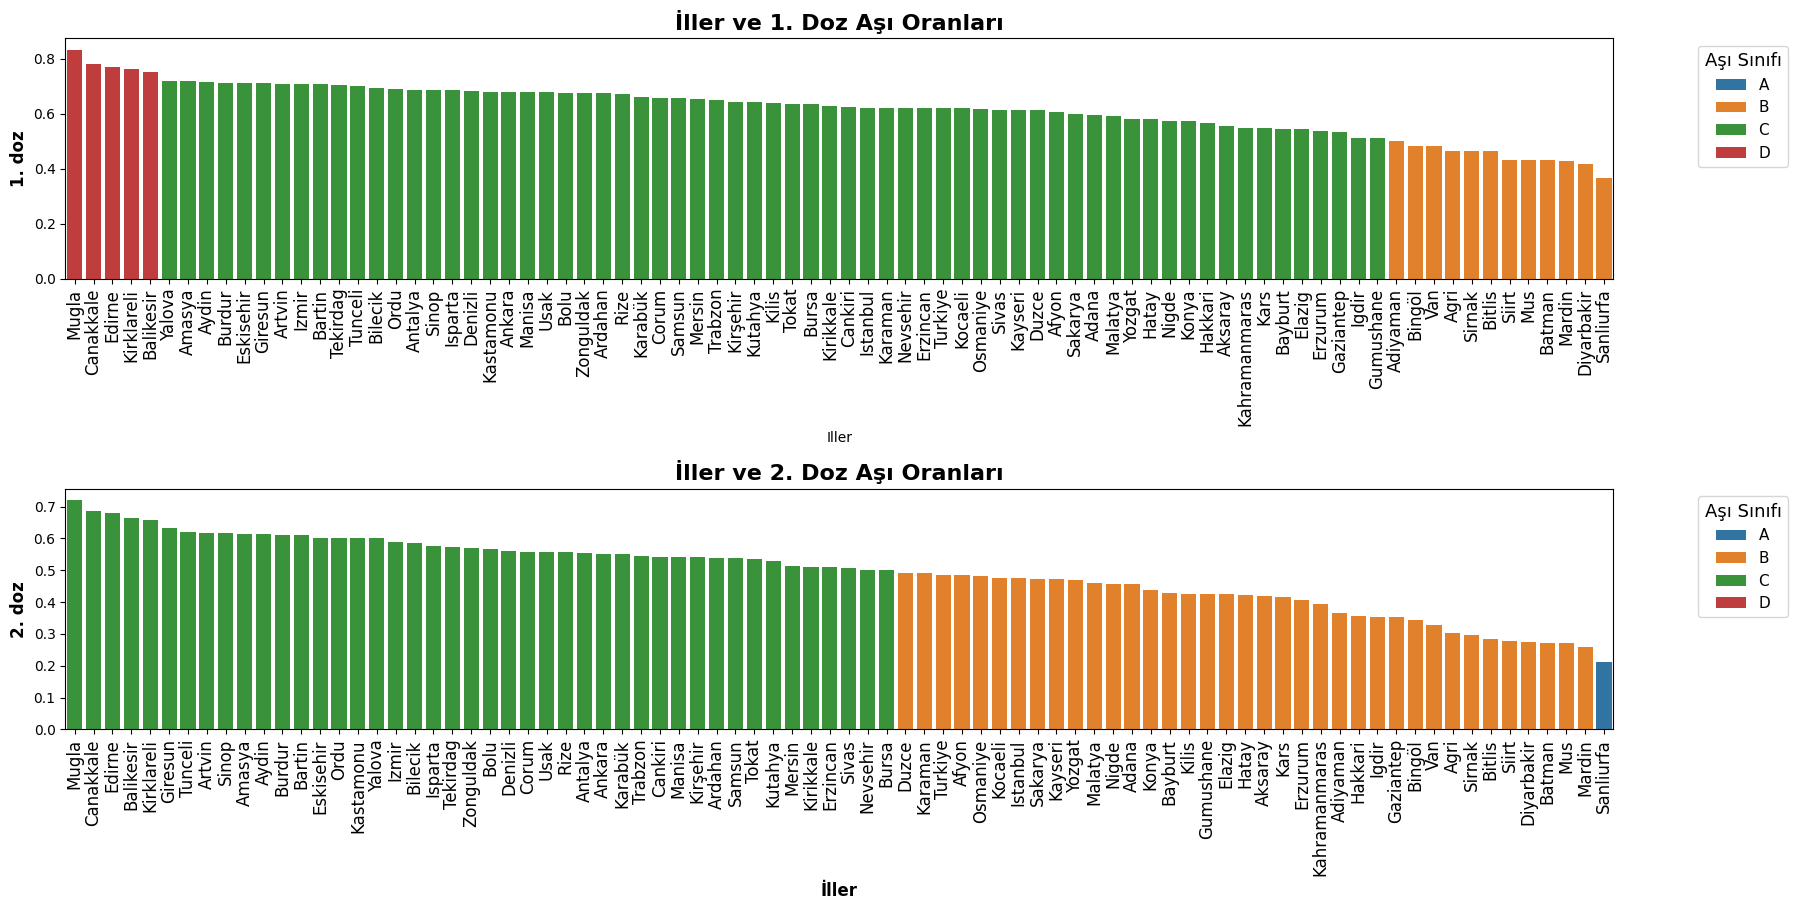

In [ ]:
df_filtered = df[df["Yil"] == 2022]
# 1. Doz ve 2. Doz sütunlarına göre sıralama yap
df_sorted_1DBN = df_filtered.sort_values(by='1DBN', ascending=False)
df_sorted_2DBN = df_filtered.sort_values(by='2DBN', ascending=False)

plt.figure(figsize=(18, 10))

# 1. Alt grafik: 1DBN'ye göre sıralanmış
plt.subplot(2, 1, 1)
sns.barplot(data=df_sorted_1DBN, x='Iller', y='1DBN', hue='BDSınıf', hue_order=['A', 'B', 'C', 'D'], palette={'A': '#1f77b4', 'B': '#ff7f0e', 'C': '#2ca02c', 'D': '#d62728'}, ci=None)
plt.ylabel('1. doz', fontweight='bold', fontsize=12)
plt.title('İller ve 1. Doz Aşı Oranları',  fontweight='bold', fontsize=16)
plt.xticks(rotation=90, fontsize=12)
plt.legend(title='Aşı Sınıfı', title_fontsize='13', fontsize='11', bbox_to_anchor=(1.05, 1), loc='upper left')

# 2. Alt grafik: 2DBN'ye göre sıralanmış
plt.subplot(2, 1, 2)
sns.barplot(data=df_sorted_2DBN, x='Iller', y='2DBN', hue='IDSınıf', hue_order=['A', 'B', 'C', 'D'], palette={'A': '#1f77b4', 'B': '#ff7f0e', 'C': '#2ca02c', 'D': '#d62728'}, ci=None)
plt.xlabel('İller', fontweight='bold', fontsize=12)
plt.ylabel('2. doz', fontweight='bold', fontsize=12)
plt.title('İller ve 2. Doz Aşı Oranları',  fontweight='bold', fontsize=16)
plt.xticks(rotation=90, fontsize=12)
plt.legend(title='Aşı Sınıfı', title_fontsize='13', fontsize='11', bbox_to_anchor=(1.05, 1), loc='upper left')

# Grafikleri düzenle ve göster
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

*   A: 0-25%
*   B: 25-50%           
*   C: 50-75%
*   D: 75-100%

*   Türkiye'nin genelinde iki doz aşı olmanın C grubunda daha fazla olduğu görülmüştür.

*   İstanbul genelinde B grubunda iki doz aşı olunduğu görülmüştür.          
*   İzmir genelinde C grubunda iki doz aşı olunduğu görülmüştür.
*   Ankara genelinde C grubunda iki doz aşı olunduğu görülmüştür.
*   Sadece Şanlıurfa'nın genelinde A grubunda iki doz aşı olunduğu görülmüştür.














# 1. Doz Aşı Oranı ve Hastalıkların Saçılım Grafiği

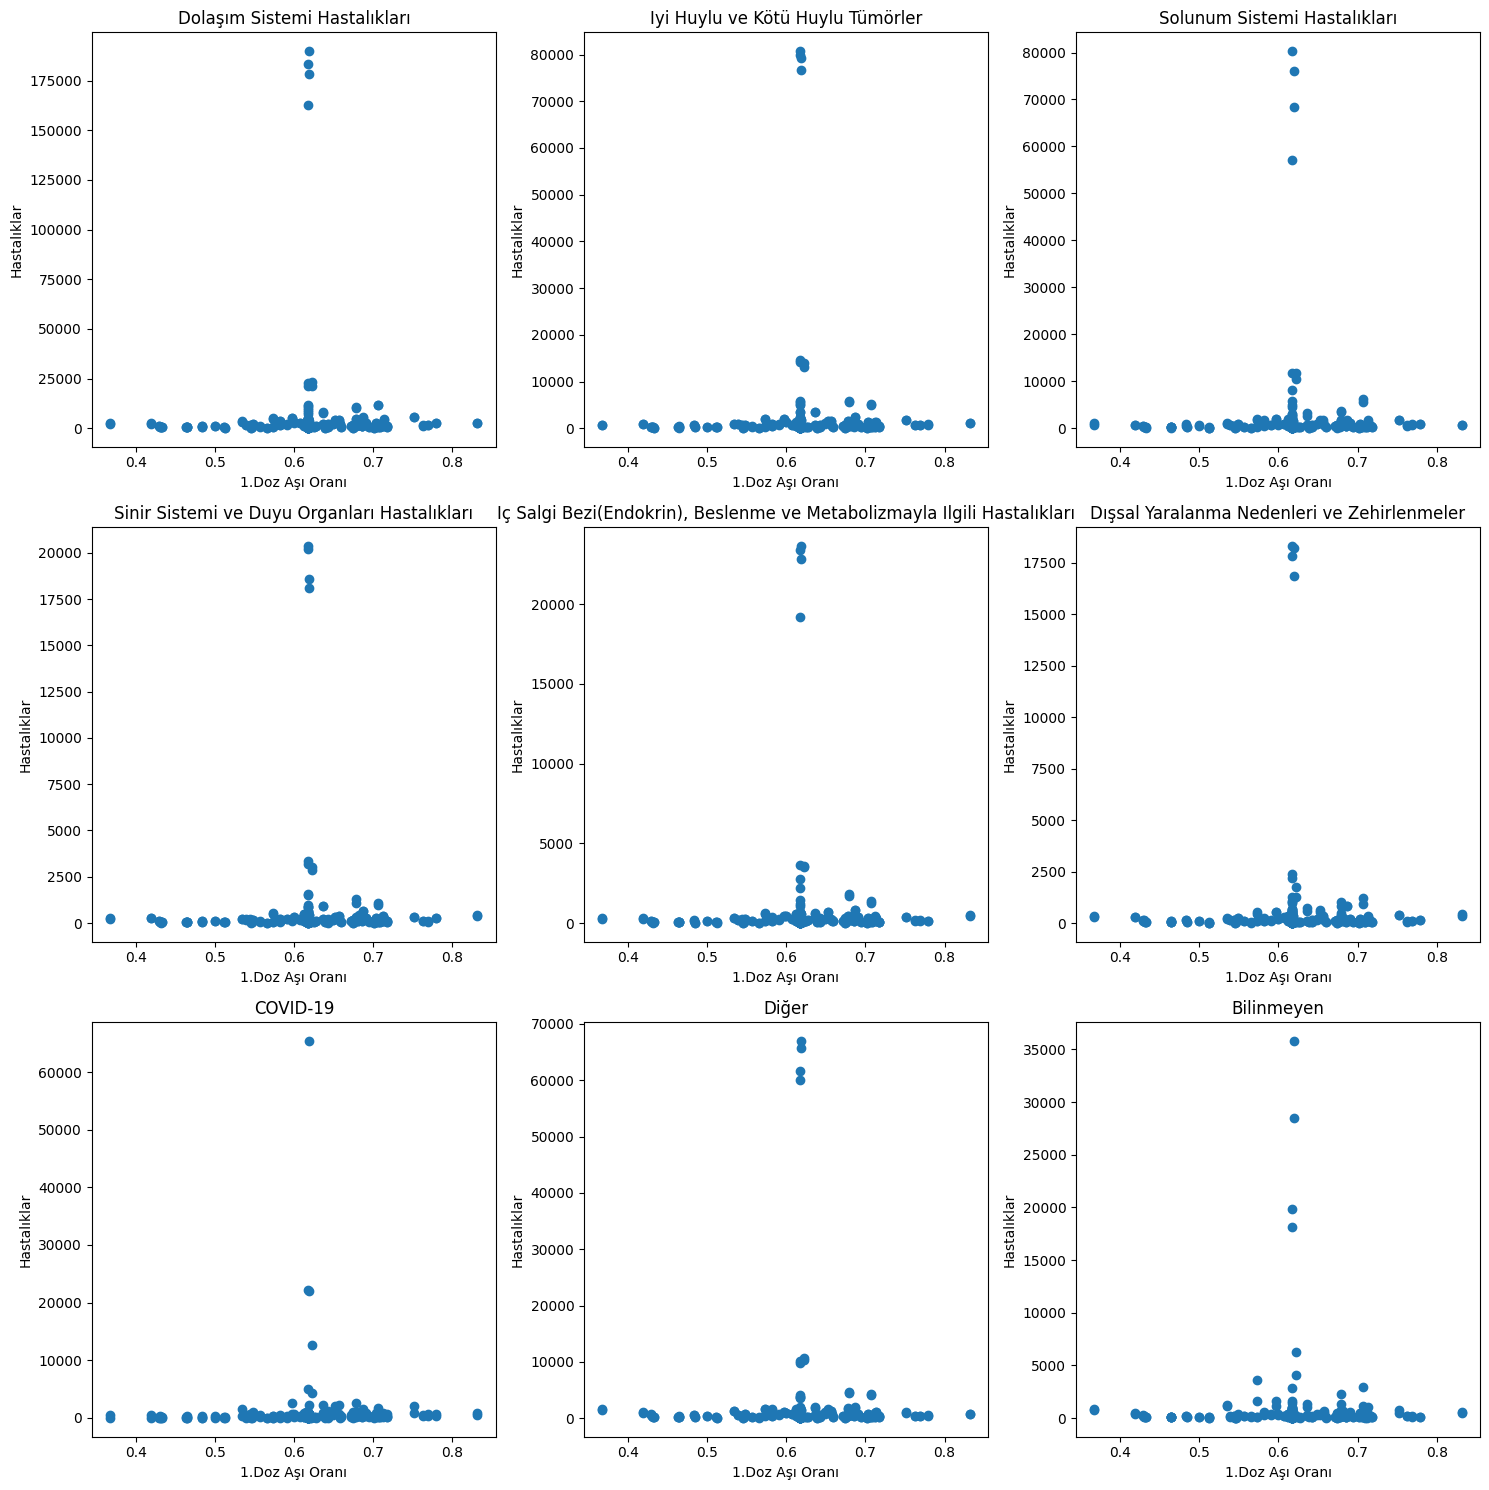

In [ ]:
columns = ['DSH', 'IHVKHT', 'SSH', 'SSVDOH', 'ISBBVMIH', 'DYNVZ', 'COVID', 'Diger', 'Bilinmeyen ']
new_columns = ['Dolaşım Sistemi Hastalıkları', 'Iyi Huylu ve Kötü Huylu Tümörler', 'Solunum Sistemi Hastalıkları',
               'Sinir Sistemi ve Duyu Organları Hastalıkları', 'Iç Salgi Bezi(Endokrin), Beslenme ve Metabolizmayla Ilgili Hastalıkları',
               'Dışsal Yaralanma Nedenleri ve Zehirlenmeler', 'COVID-19', 'Diğer', 'Bilinmeyen']


column_mapping = dict(zip(columns, new_columns))# Sütunların eski ve yeni adlarını eşler
df.rename(columns=column_mapping, inplace=True)# Veri çerçevesindeki sütunları yeniden adlandırır

# 3x3 bir alt grafik düzeni oluşturur ve her birinin içeriğini doldurur
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(15, 15))
axes = axes.flatten()

# Her alt grafik için dağılım grafiği oluşturur
for ax, col in zip(axes, new_columns):
    ax.scatter(df['1DBN'], df[col])
    ax.set_title(col)
    ax.set_xlabel('1.Doz Aşı Oranı')
    ax.set_ylabel('Hastalıklar')

# Grafikleri düzenler ve görüntüler
plt.tight_layout()
plt.show()

# 2. Doz Aşı Oranı ve Hastalıkların Saçılım Grafiği

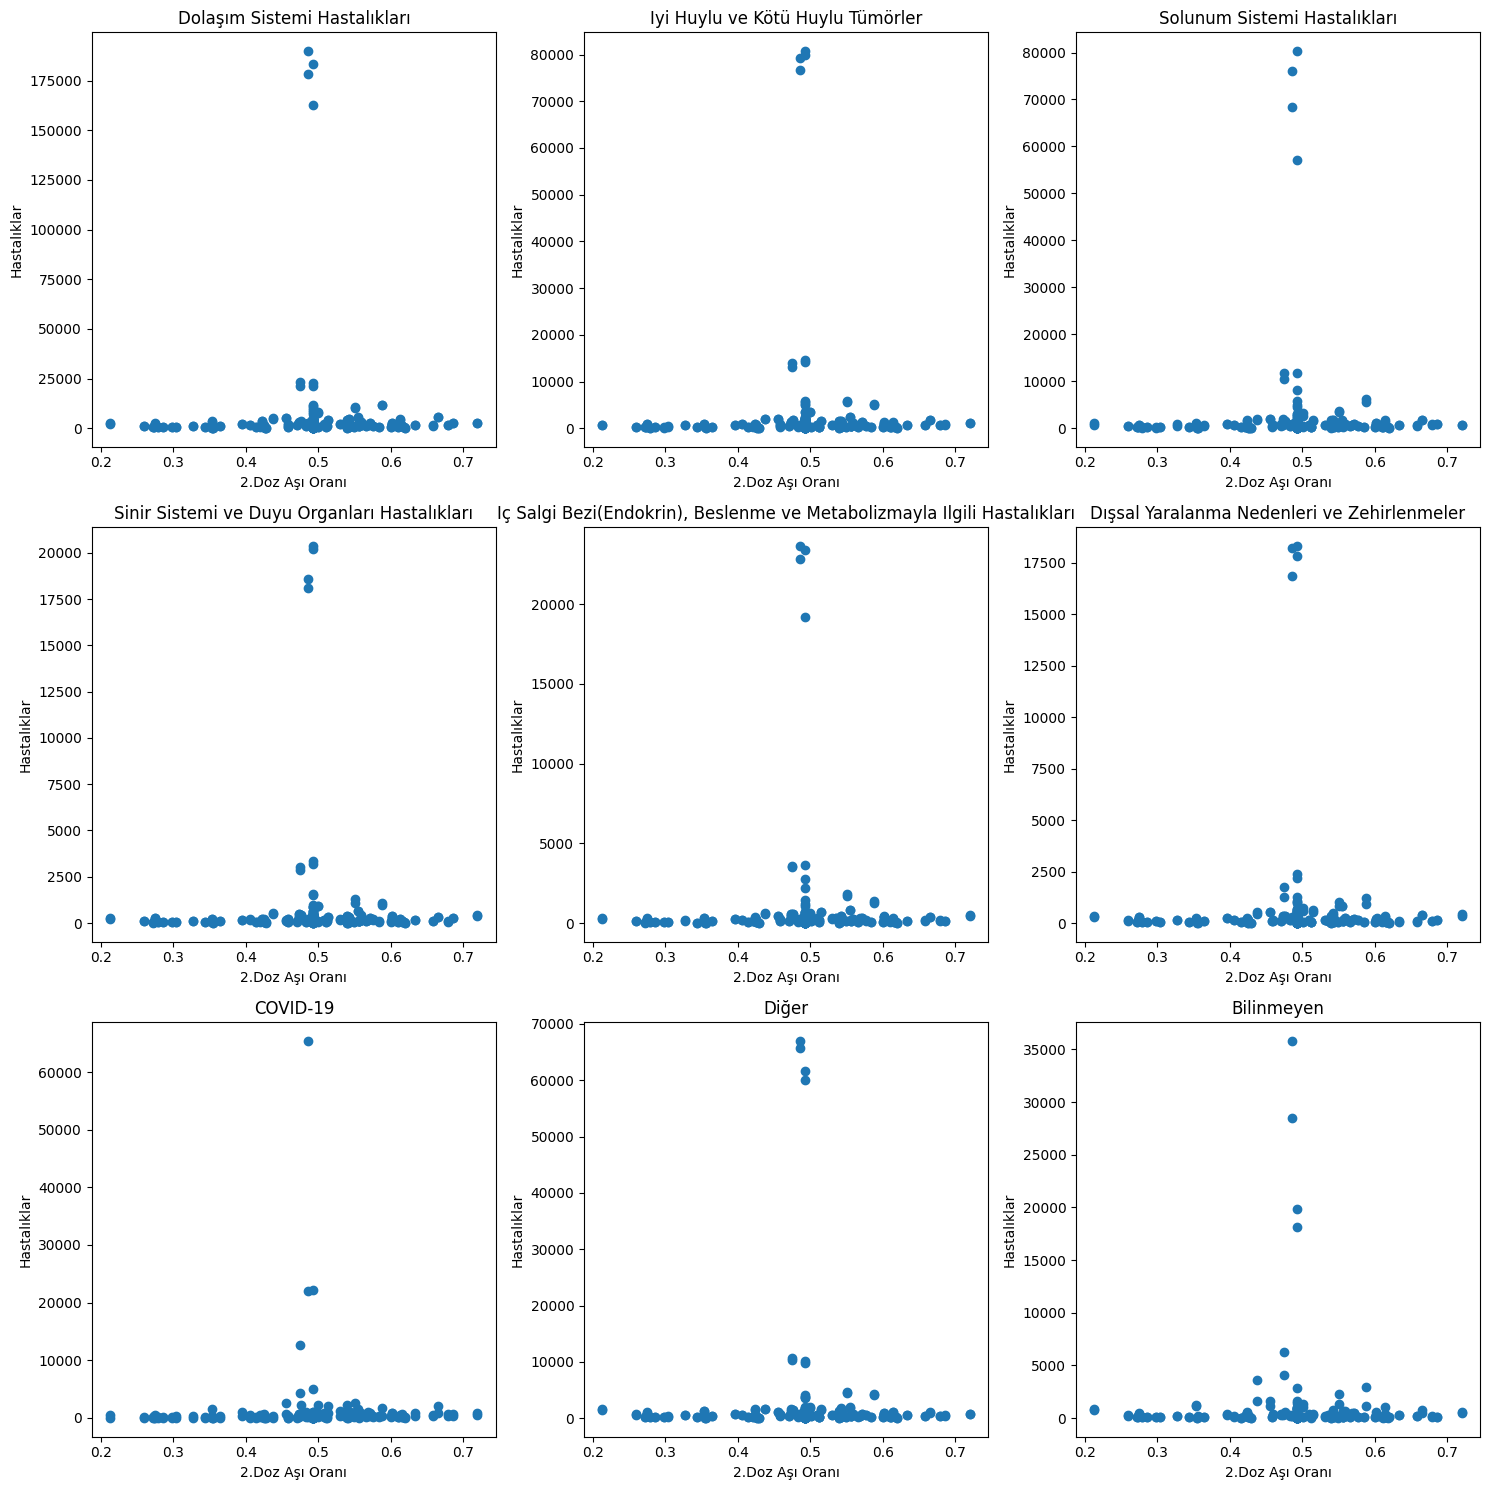

In [ ]:
columns = ['DSH', 'IHVKHT', 'SSH', 'SSVDOH', 'ISBBVMIH', 'DYNVZ', 'COVID', 'Diger', 'Bilinmeyen']
new_columns = ['Dolaşım Sistemi Hastalıkları', 'Iyi Huylu ve Kötü Huylu Tümörler', 'Solunum Sistemi Hastalıkları',
               'Sinir Sistemi ve Duyu Organları Hastalıkları', 'Iç Salgi Bezi(Endokrin), Beslenme ve Metabolizmayla Ilgili Hastalıkları',
               'Dışsal Yaralanma Nedenleri ve Zehirlenmeler', 'COVID-19', 'Diğer', 'Bilinmeyen']

column_mapping = dict(zip(columns, new_columns))# Sütunların eski ve yeni adlarını eşler
df.rename(columns=column_mapping, inplace=True)# Veri çerçevesindeki sütunları yeniden adlandırır

# 3x3 bir alt grafik düzeni oluşturur ve her birinin içeriğini doldurur
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(15, 15))
axes = axes.flatten()

# Her alt grafik için dağılım grafiği oluşturur
for ax, col in zip(axes, new_columns):
    ax.scatter(df['2DBN'], df[col])
    ax.set_title(col)
    ax.set_xlabel('2.Doz Aşı Oranı')
    ax.set_ylabel('Hastalıklar')

# Grafikleri düzenler ve görüntüler
plt.tight_layout()
plt.show()

# Çoklu Regresyon Modeli

In [ ]:
from scipy import stats

# Veri çerçevesinden bağımlı ve bağımsız değişkenler belirlenir
X = df[['1DBN', '2DBN']]
dependent_vars = ['DSH', 'IHVKHT', 'SSH', 'SSVDOH', 'ISBBVMIH', 'DYNVZ', 'COVID', 'Diger', 'Bilinmeyen ']

# Bağımlı değişkenlerin isimleri atanır
isim = ['Dolaşım Sistemi Hastalıkları', 'Iyi Huylu ve Kötü Huylu Tümörler', 'Solunum Sistemi Hastalıkları',
        'Sinir Sistemi ve Duyu Organları Hastalıkları', 'Iç Salgi Bezi(Endokrin), Beslenme ve Metabolizmayla Ilgili Hastalıkları',
        'Dışsal Yaralanma Nedenleri ve Zehirlenmeler', 'COVID-19', 'Diğer', 'Bilinmeyen']

for dep_var in dependent_vars:
    df[dep_var] = pd.to_numeric(df[dep_var], errors='coerce')

def fit_and_print_model(X, y):
    X = sm.add_constant(X)
    model = sm.OLS(y, X).fit()
    print(model.summary())
    print("\n" + "=" * 80 + "\n")
    return model

# Her bir bağımlı değişken için model oluşturulur ve özetleri yazdırılır
models = []
for dep_var in dependent_vars:
    print(f"Model for {dep_var} ({isim[dependent_vars.index(dep_var)]}):")
    model = fit_and_print_model(X, df[dep_var])
    models.append(model)

# Model sonuçlarına göre hata terimlerinin normal dağılım testi yapılır
print("\nNormality Test for Residuals:")
for model, dep_var, dep_name in zip(models, dependent_vars, isim):
    statistic, p_value = stats.normaltest(model.resid)
    print(f"Dependent Variable: {dep_var} ({dep_name})")
    print(f"Statistic:  {statistic:.4f}")
    print(f"P-value: {p_value:.4f}")

Model for DSH (Dolaşım Sistemi Hastalıkları):
                            OLS Regression Results                            
Dep. Variable:                    DSH   R-squared:                       0.004
Model:                            OLS   Adj. R-squared:                 -0.003
Method:                 Least Squares   F-statistic:                    0.5759
Date:                Wed, 05 Jun 2024   Prob (F-statistic):              0.563
Time:                        14:08:44   Log-Likelihood:                -3707.1
No. Observations:                 328   AIC:                             7420.
Df Residuals:                     325   BIC:                             7432.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const 

In [ ]:
coefficients = {}# Katsayıları saklamak için bir sözlük oluşturuluyor.

# Her bir bağımlı değişken için OLS regresyon modelinin katsayıları hesaplanıyor.
for dep_var, model in zip(dependent_vars, models):
    coef_dict = {}# Katsayıları saklamak için bir iç içe sözlük oluşturuluyor.
    coef_dict['Intercept'] = model.params[0]# Sabiti (intercept) alıyoruz.
    # Bağımsız değişkenlerin katsayılarını alıyoruz.
    for i, col in enumerate(X.columns):
        coef_dict[col] = model.params[i+1]
    coefficients[dep_var] = coef_dict# Katsayıları ana sözlüğe ekliyoruz.

# Her bir bağımlı değişken için katsayılar yazdırılıyor.
for dep_var, coef_dict in coefficients.items():
    print(f"Model for {dep_var} ({isim[dependent_vars.index(dep_var)]}):")
    for col, coef in coef_dict.items():
        print(f"Katsayı ({col}): {coef}")# Her bir katsayı yazdırılıyor.
    print("\n" + "="*80 + "\n")

Model for DSH (Dolaşım Sistemi Hastalıkları):
Katsayı (Intercept): -16344.126933004187
Katsayı (1DBN): 90030.31202331488
Katsayı (2DBN): -70768.1837870056


Model for IHVKHT (Iyi Huylu ve Kötü Huylu Tümörler):
Katsayı (Intercept): -7740.026562854502
Katsayı (1DBN): 42427.04899399691
Katsayı (2DBN): -33524.07263396944


Model for SSH (Solunum Sistemi Hastalıkları):
Katsayı (Intercept): -6704.6809199407
Katsayı (1DBN): 37079.81895976009
Katsayı (2DBN): -29356.511220398712


Model for SSVDOH (Sinir Sistemi ve Duyu Organları Hastalıkları):
Katsayı (Intercept): -1747.7368188184014
Katsayı (1DBN): 9714.068302378486
Katsayı (2DBN): -7666.160508273344


Model for ISBBVMIH (Iç Salgi Bezi(Endokrin), Beslenme ve Metabolizmayla Ilgili Hastalıkları):
Katsayı (Intercept): -2230.646210900558
Katsayı (1DBN): 12224.598943605906
Katsayı (2DBN): -9684.800370673303


Model for DYNVZ (Dışsal Yaralanma Nedenleri ve Zehirlenmeler):
Katsayı (Intercept): -1497.6377599135324
Katsayı (1DBN): 8669.64977487965
Kat

# Çoklu Regresyon Denklemi

# Hastalıklar = B0 + B1 X 1DBN + B2 X 2DBN

*   Hastalıklar : Bağımlı Değişken
*   1DBN, 2DBN: Bağımsız Değişken




In [ ]:
for dep_var, coef_dict in coefficients.items():
    equation = f"{coef_dict['Intercept']:.2f} + " # Sabiti (intercept) alıyoruz.
     # Bağımsız değişkenlerin katsayılarını ve isimlerini kullanarak regresyon denklemini oluşturuyoruz.
    for col, coef in coef_dict.items():
        if col != 'Intercept':
            equation += f"({coef:.2f} * {col}) + "# Bağımsız değişkenler ve katsayıları ekleniyor.
    equation = equation[:-2]# Son '+' işaretini kaldırıyoruz.
    print(f"{dep_var} ({isim[dependent_vars.index(dep_var)]}) = ", equation) # Regresyon denklemi yazdırılıyor.
    print("\n" + "="*80 + "\n")

DSH (Dolaşım Sistemi Hastalıkları) =  -16344.13 + (90030.31 * 1DBN) + (-70768.18 * 2DBN) 


IHVKHT (Iyi Huylu ve Kötü Huylu Tümörler) =  -7740.03 + (42427.05 * 1DBN) + (-33524.07 * 2DBN) 


SSH (Solunum Sistemi Hastalıkları) =  -6704.68 + (37079.82 * 1DBN) + (-29356.51 * 2DBN) 


SSVDOH (Sinir Sistemi ve Duyu Organları Hastalıkları) =  -1747.74 + (9714.07 * 1DBN) + (-7666.16 * 2DBN) 


ISBBVMIH (Iç Salgi Bezi(Endokrin), Beslenme ve Metabolizmayla Ilgili Hastalıkları) =  -2230.65 + (12224.60 * 1DBN) + (-9684.80 * 2DBN) 


DYNVZ (Dışsal Yaralanma Nedenleri ve Zehirlenmeler) =  -1497.64 + (8669.65 * 1DBN) + (-6940.24 * 2DBN) 


COVID (COVID-19) =  -4504.82 + (23426.47 * 1DBN) + (-18395.27 * 2DBN) 


Diger (Diğer) =  -5925.38 + (34470.74 * 1DBN) + (-28011.11 * 2DBN) 


Bilinmeyen  (Bilinmeyen) =  -2994.78 + (17097.10 * 1DBN) + (-14075.22 * 2DBN) 




# Çoklu Regresyon Modeli (2.YOL)

In [ ]:
from scipy import stats

# Veri çerçevesinden bağımlı ve bağımsız değişkenler belirlenir
dependent_vars = ['1DBN', '2DBN']
independent_vars = ['DSH', 'IHVKHT', 'SSH', 'SSVDOH', 'ISBBVMIH', 'DYNVZ', 'COVID', 'Diger', 'Bilinmeyen ']

# Bağımlı değişkenlerin isimleri atanır
independent_names = ['Dolaşım Sistemi Hastalıkları', 'Iyi Huylu ve Kötü Huylu Tümörler', 'Solunum Sistemi Hastalıkları',
                     'Sinir Sistemi ve Duyu Organları Hastalıkları', 'Iç Salgi Bezi(Endokrin), Beslenme ve Metabolizmayla Ilgili Hastalıkları',
                     'Dışsal Yaralanma Nedenleri ve Zehirlenmeler', 'COVID-19', 'Diğer', 'Bilinmeyen']

# Her bir bağımlı değişken için model oluşturulur ve özetleri yazdırılır
for dep_var in dependent_vars:
    for ind_var, ind_name in zip(independent_vars, independent_names):
        print(f"Model for {ind_var} ({ind_name}):")
        y = pd.to_numeric(df[dep_var], errors='coerce')
        X = df[[ind_var]]
        X = sm.add_constant(X)
        model = sm.OLS(y, X).fit()
        print(model.summary())
        print("\n" + "=" * 80 + "\n")

# Model sonuçlarına göre hata terimlerinin normal dağılım testi yapılır
        print(f"Bağımlı değişken olarak {dep_var} ve bağımsız değişken olarak {ind_var} ({ind_name}) Kalıntıları için Normallik Testi:")
        statistic, p_value = stats.normaltest(model.resid)
        print(f"Statistic:  {statistic:.4f}")
        print(f"P-value: {p_value:.4f}")
        print("\n" + "=" * 80 + "\n")
    break


Model for DSH (Dolaşım Sistemi Hastalıkları):
                            OLS Regression Results                            
Dep. Variable:                   1DBN   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.003
Method:                 Least Squares   F-statistic:                    0.1378
Date:                Wed, 05 Jun 2024   Prob (F-statistic):              0.711
Time:                        14:09:01   Log-Likelihood:                 423.18
No. Observations:                 328   AIC:                            -842.4
Df Residuals:                     326   BIC:                            -834.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const 

In [ ]:
coefficients = {}# Katsayıları saklamak için bir sözlük oluşturuluyor.
# Her bir bağımlı değişken için OLS regresyon modelinin katsayıları hesaplanıyor.
for dep_var, model in zip(dependent_vars, models):
    coef_dict = {}# Katsayıları saklamak için bir iç içe sözlük oluşturuluyor.
    coef_dict['Intercept'] = model.params[0]# Sabiti (intercept) alıyoruz.
    # Bağımsız değişkenlerin katsayılarını alıyoruz.
    for i, col in enumerate(model.params.index[1:]):
        coef_dict[independent_vars[i]] = model.params[i+1]
    coefficients[dep_var] = coef_dict# Katsayıları ana sözlüğe ekliyoruz.

# Her bir bağımlı değişken için katsayılar yazdırılıyor.
for dep_var, coef_dict in coefficients.items():
    print(f"{dep_var}:\n")
    print(f"Coefficient\n")
    for col in independent_vars:
        print(f"{col}: {coef_dict.get(col)}")# Her bir katsayı yazdırılıyor.
    print("\n" + "="*80 + "\n")


1DBN:

Coefficient

DSH: 90030.31202331488
IHVKHT: -70768.1837870056
SSH: None
SSVDOH: None
ISBBVMIH: None
DYNVZ: None
COVID: None
Diger: None
Bilinmeyen : None


2DBN:

Coefficient

DSH: 42427.04899399691
IHVKHT: -33524.07263396944
SSH: None
SSVDOH: None
ISBBVMIH: None
DYNVZ: None
COVID: None
Diger: None
Bilinmeyen : None




In [ ]:
for dep_var, coef_dict in coefficients.items():
    equation = f"{coef_dict['Intercept']:.2f}"# Sabiti (intercept) alıyoruz.
    # Bağımsız değişkenlerin katsayılarını ve isimlerini kullanarak regresyon denklemini oluşturuyoruz.
    for col, coef in coef_dict.items():
        if col != 'Intercept':
            equation += f" + ({coef:.2f} * {col})"# Bağımsız değişkenler ve katsayıları ekleniyor.
    print(f"{dep_var} = {equation}")# Regresyon denklemi yazdırılıyor.
    print("\n" + "="*80 + "\n")

1DBN = -16344.13 + (90030.31 * DSH) + (-70768.18 * IHVKHT)


2DBN = -7740.03 + (42427.05 * DSH) + (-33524.07 * IHVKHT)


